$$ \small{\textbf{Digital Signal Processing and Deep Learning/Machine learning }} $$   
$$ \large{\textbf{Unsupervised classification: Malfunctioning Industrial Machine Investigation and Inspection}} $$
<br>
$$ \small{\textbf{Dr. Stéphane DEDIEU, Spring - Summer 2024 }} $$

$$\large{\textbf{ PART I:   Preliminary Activities}} $$

# General Introduction

<br>

<span style="color:#4169E1">  
    
    
Factory machinery is prone to failure or breakdown, resulting in significant expenses for companies. Hence, there is a rising in
terest in machine monitoring using different sensors including microphones. In the scientific community, the emergence of public
datasets has led to advancements in acoustic detection and classification of scenes and events, but there are no public datasets that focus on the sound of industrial machines under normal and anomalous operating conditions in real factory environments. 
    
We develop an automatic unsupervised classification model or automatic diagnosis model for detecting failures or breakdowns of industrial machinery based on their acoustics characteristics, recorded with a 8-microphones circular array. 
       
The model is based on the MIMII dataset by Hitachi, Ltd described in the next section.    
Many unsupervised classification models based on this dataset are available in the literature or on Github. We will provide the links and references. 
    
 In this study we somewhat violate the rules of the initial challenge: classification in noisy environment. But since we have access to multiple channels, it makes much sense to denoise the signals before starting the classification process. 

 Therefore, here the challenge is more about turning the 8-microphones array into a <b> "sensor" for monitoring industrial machinery sounds in a noisy envionement.</b> And identifying anomalies, failures, breakdowns.    
    
    
Instead of classifying various machines or types of machines: pump, fan, valve, slider, ...  we will:
    
- focus on a specific machine type: valve
- denoise the recordings* using MVDR beamforming and a custom fixed Generalized Sidelobe Canceler (GSC)
- apply unsupervised classification: auto-encoder to two sets: single microphone recordings and denoised GSC output.   
    
  
<i>*Note that in all noisy recordings, the background noise was recorded separately with the 8-microphones array, and added to the devices sounds.  3 cases: SNR= -6 dB, 0 dB, 6 dB. </i>  
    
  
<b> Plan  </b> 
    
- I   Dataset MIMII
- II  Analysis of sounds/noises
- III Introduction to Denoising strategy
- IV  Valve Activity Detector (VAD)
- V   MVDR + GSC:  creation of a new dataset with single channel of denoised recordings: the GSC output.  
- VI Classification Methodology
- VII  Results
- VIII   Conclusions 
    
    
<b> Potential Applications </b>  

- <b> Rotating machinery </b> Failure Detection: bearings, motors,rotors.  
- <b> HVAC </b> Fault detection and diagnosis (FDD): pumps, compressors, valves.                  

<br> 
<b>Keywords:</b> Python, TensorFlow, Deep Learning, Complex Continuous Wavelets 

## Dataset: Recording environment and Set-up 
    
<br>
<span style="color:#4169E1">  
    
We quote the reference article [1] in green: 
    
Regarding the dataset:  <br> 
 
<span style="color:#029942">  

<i> "In this paper, we present a new dataset of industrial machine sounds that we call a sound dataset for malfunctioning industrial machine investigation and inspection (MIMII dataset). Normal sounds were recorded for different types of industrial machines (i.e., valves, pumps, fans, and slide rails), and to resemble a real-life scenario, various anomalous sounds were recorded (e.g., contamination, leakage, rotating unbalance, and rail damage). The purpose of releasing the MIMII dataset is to assist the machine-learning and signal processing community with their development of automated facility maintenance." </i>
<br>
<span style="color:#4169E1">  
Regarding the 8-microphones recordings:
<span style="color:#029942">  
<i> "The dataset was collected using a TAMAGO-03 microphone manufactured by System In Frontier Inc. [21]. It is a circular micro-
phone array that consists of eight distinct microphones, the details of which are shown in Fig. 1. By using this microphone array, we can evaluate not only single-channel-based approaches but also multi-channel-based ones. The microphone array was kept at a distance of 50 cm from the machine (10 cm in the case of valves), and 10-second sound segments were recorded. The dataset contains eight separate channels for each segment. Figure 2 depicts the recording setup with the direction and distance for each kind of machine. Note that each machine sound was recorded in a separate session. Under the running condition, the sound of the machine was recorded as 16-bit audio signals sampled at 16 kHz in a reverberant environment. Apart from the target machine sound, background noise in multiple real factories was continuously recorded and later mixed with the target machine sound for simulating real environments. For recording the background noise, we used the same microphone array as for the target machine sound."</i>
<br>
<span style="color:#4169E1">  
All datasets for normal and "abnormal" machines: pumps, valves, sliders, fans can be downloaded here:
    
https://zenodo.org/records/3384388  
    
<span style="color:#4169E1">  
Part of this dataset: Single channel microphone only, plus Toy car, Toy conveyor, was used in the DCASE 2020 Challenges in 2020 and in the following years.  
    
https://dcase.community/challenge2020/task-unsupervised-detection-of-anomalous-sounds

https://dcase.community/challenge2022/task-unsupervised-anomalous-sound-detection-for-machine-condition-monitoring    
    

    
#### Microphone Array     
    
The MIMII dataset was recorded with the follwing 8-microphones array:  <br> 

    
| <p align="center"> <img src="MIMII_Microphone_array.png" width="300"  /> </p> |  <p align="center"> <img src="Tamago_egg.png" width="200"  /> </p> |   
| ---       |   ---  |   
| <center> <b><i> The circular microphone array <br> from [1] </i></b> </center> |   <center> <b><i> The Tamago concept <br> from https://www.sifi.co.jp/en/product/microphone-array/ </i></b> </center> |     
    
The microphone array is embedded in a hard "egg shape" in a vertical position. For optimizing the beamformer, we should account for the diffraction of acoustic waves on the egg shape. This requires either:
- an approximation of the egg shape by a prolate spheroid providing an analytical solution of the ascoutic field 
- or a Boundary Element Model 
    
We may work on an analytical model, the prolate spheroid but it will take some time. <span style="color:#900C3F">  At the moment we will treat the 8-microphone array in free field. It is an approximation, and the MVDR beamformer will perform properly at low frequency when the acoustic wavelength is very large compared with the size of the egg, but it will poorly perform in the medium and high frequency range.  </span>
   
    
The configuration for recording the various machines is presented below.  
    
| <p align="center"> <img src="MIMII_Microphone_array_setup.png" width="400"  /> </p> |  
| ---       |   
| <center> <b><i> Recording configuration with the circular microphone array <br> from [1] </i></b> </center> |      
    

    

    
    
    
https://www.sifi.co.jp/en/product/microphone-array/
    
    
    
    
    
    
   
    
Index Terms  
Machine sound dataset, Acoustic scene classification, Anomaly detection, Unsupervised anomalous sound detection  


Challenges have been closed for a while 
Our approach is different.    
    

    
- SNR= 6 dB
- SNR= 0 dB
- SNR= -6 dB



##  Denoising ? 

<br>

<span style="color:#4169E1">  
    

In many results with the DCASE2020, DCASE2022 challenge datasets, that include single channels of the MIMII dataset, noise and reverberation are often reported as a contributing factor for poor classification accuracy.  
<br>
If we were to design a system for acquiring industrial sounds, a microphone array is an ideal tool to:

- attenuate reverberations.
- attenuate ambient noise.

with the ability to steer a beam in the direction of interest: the sound source to be monitored.   


Can a beamformer get rid of ambient noise artifically added to the sound of interest ? 
    
- Assuming mic 1 is in the direction of the source, and that some noise was recorded in the direction of microphone number 1, it will be difficult to denoise the recording.  
- if some isotropic ambient noise was recorded, in this case the beamformer will be efficient








    
##  Multi-Microphone diagnosis sensor.

<br>
<span style="color:#4169E1">  
    
    
If we were to design a sensor for monitoring industrial machinery sounds, in a noisy envionement, then a multi-microphone sesnor i.e. a microphone array, makes absolute sense. 8 microphones might be an overkill, but 6 microphones in a small form factor would do a good job. 
    Here we are going to turn the TAMAGO microphone array in a diagnosis sensor. 
    With proper beamforming filters and noise reduction strategy. 
<br>    
    
    
####  Beamforming
    
Beamforming is a noise reduction technique based on <b><i>spatial filtering</i></b>. Basically the multiple microphones capture acoustic waves  and thei output is combined to increase the gain in a specific direction. 
Beamforming can be combined with classic Noise Reduction techniques as we will see in the next section.       
    
The 68 mm diameter microphone array is small and the number of microphones: 8 is an overkill, and it will oversample acoustic waves at low frequency. When implementing MVDR beamforming we will introduce significant regularization which will limit the Directivity Index. <b> After multiple experimentation, strong regularization was needed... even minor microphone mismatch in magnitude and phase, can significantly degrade the performance of the beamformer. </b>

R=0.068/2; <br> % Radius of the circular array.
%Circular array geometry <br>
- RP(1,:)= [R                   0                        0.00];
- RP(2,:)= [R*cos(45*pi/180)    R*sin(45*pi/180)         0.00];
- RP(3,:)= [R*cos(90*pi/180)    R*sin(90*pi/180)         0.00];
- RP(4,:)= [R*cos(135*pi/180)   R*sin(135*pi/180)        0.00];
- RP(5,:)= [R*cos(pi)           0                        0.00];
- RP(6,:)= [R*cos(225*pi/180)   R*sin(225*pi/180)        0.00];
- RP(7,:)= [R*cos(270*pi/180)   R*sin(270*pi/180)        0.00];
- RP(8,:)= [R*cos(315*pi/180)   R*sin(315*pi/180)        0.00];

    
|<p align="center"> <img src="Wopt_00deg.png" width="450"  /> </p> |  <p align="center"> <img src="DI_90deg_sig5_1em4.png" width="400"  /> </p> |
|       ---       |         ---       | 
| <center> <b><i> Optimum filters 000 deg </i></b> </center> | <center> <b><i> Directivity Index </i></b> </center> |       
    
    
####  Beampatterns
    
| <p align="center"> <img src="Directivity_HorizontalPlan.png" width="350"  /> </p> |  
|       ---       |       
| <center> <b><i> Directivity v. Frequency - Horizontal plane. </i></b> </center> |     
    

The main beam is steered at 000 degrees. In the valve direction. <br>
Beamforming Filters in the frequency domain: real_part and imaginary part are stored in the following files: 

Filters:  512 points, Fs= 16000 Hz, double-sided ! 

Frequencies=[0 : Fs/NFFT : Fs-Fs/NFFT]


Computing optimal MVDR beamforming filters   
    
The 8-microphones array is embedded in a rigid egg shape. It cannot be treated as free field array, except at low frequency when the acoustic wavelength is very large compared with the size of the egg. We will assume that the TAMAGO egg is a hard prolate spheroid and we will use analytical or semi-analytical models for characterezing the acoustics field diffracted by the "egg".  This will be devlopped in PART II.  Beamforming.      
    
Main beam: 
  

Noise channel

The Noise channel is intended to implement a non-adaptive Generalized Sidelobe Canceller or Multi-channel Wiener.  

The code for generating the 2 sets of filters is confidential. Especially the "noise channel" filters, since it is a custom implementation that alleviates ill-conditonned noise coherence matrix at low frequency, when the acoustic wavelenth is very large compared with the size of the array. And it is the case here with a small 60mm diameter array.    

Theoretical aspects for computing the filters are presented in Ward [], chapter II: <i> "Superdirective Microphone Arrays" </i>. 
We compute:     
- optimal MVDR beamforming filters, for the main beam and main channel. Where we assume an isotropic noise field. Filters $W^H_f$  on the block diagram. 
- filters of a non adaptive generalized side lobe canceller (GSC) or multi-channel Wiener for the secondary, "orthogonal" channel. Filters $W^H_{v}B$ on the block diagram. 
   
The computation of the filters is left as an exercise. Some experimentation will be needed for regularizing the various ill-conditionned matrices. 

#### Generalized Side Lobe Canceller 

We will use a fixed beamforming approch. Where the GSC has a frozen filters and enhances 
The fixed GSC strategy is equivalent to a multi-channel Wiener gain. 

Denoising is performed in two stages:

- beamforming alone 
- Generalized Sidelobe Canceller with 2 channels 

https://www.researchgate.net/figure/General-structure-of-the-generalized-sidelobe-canceller-GSC-with-Y-k-b-being-the_fig2_224208512
    
    
| <p align="center"> <img src="GSC_blockdiagram.png" width="600"  /> </p> |  
| ---       |   
| <center> <b><i> GSC Block-Diagram from [6] </i></b> </center> |       
    

We propose a pseudo-real time implementation.     
A "valve activity detector" would be needed when performing the spectral subtraction: when the valve is active, the algorithm stops collecting noise frames!    

In a first approximation we will work without a "valve activity detection". Because the background noise is somewhat pesudo-stationary while the valve sound is brief, we will collect a long "noise history" that will     . This method will not work for other devices: pump, fan. 

The GSC introduces distortion in the valve sound. This may not be a problem if we train the model with distorted valve sounds.  But it would be a redhibitory issue for ASR applications for example.    

    
    
Pseudo code: 
For denoising the recordings:
- Nfft= 512, fs=16000Hz, t= 32 ms.  
- sliding a NFFT=512 points window frame on the 10 s recordings with a shift of NFFT/3  
- compute the FFT of each microphone channel.
- apply the beamforming filters to each microphone channel in the frequency domain
- sum
- compute the IFFT
- rebuild the denoised signal frame by frame. 

The procedure is in the attached Octave/Matlab script. It will be turned into a Python code.  

##  Valve Activity Detection (VAD)

<br> 
<span style="color:#4169E1">  
    
Just like in speech enhancements, for optimum performance, the second stage of the denoising algorithm, must stop collecting noise frames when the valve is active. 
Therefore we design a VAD. Not voice activity detection but "Valve Activity Detection". 
    
We created two datasets of 512 points mono sound frames, 32 ms, sampled at fs= 16kHz. 
    
- Valve sound frames: collected in the <b>6dB SNR</b> dataset, Normal, id00, id02, id04, id06. Ideally we would like to have access to valve sounds in silent background, but this data is not available. We had access to "noisy" valve sound frames only, the reason why we selected the best SNR data available.     
- Background noise frames: collected in the <b>-6dB SNR</b> dataset, Normal, id00, id02, id04, id06 when valves are not active. 
    
In this notebook we will investigate: 
    
- low complexity VAD models based on Machine Learning. These models will be used in our 2-stages Noise Reduction algorithm. 
- high complexity models based on advanced features and Deep Learning.  
    
The low complexity models are the priority for proceeding with Noise Reduction. <br> 
The Notebook will be updated on a regular basis with more advanced models. 
    
    
    
    
<span style="color:#4169E1">  

For designing the valve activity detector we will: <br>
- build labeled datasets of background noise and valve sounds. Ideally we should have access to valve sound without any noise.   
- 32 ms frames. Nfft=512 bins.  
- compute STFT, mel-spectrograms or wavelets transforms.
- build a Deep Learning model.  CNN.   

###   References 

<br>
<span style="color:#4169E1">  
    

https://github.com/MIMII-hitachi/mimii_baseline/
    

[1] Harsh Purohit, Ryo Tanabe, Kenji Ichige, Takashi Endo, Yuki Nikaido, Kaori Suefusa, and Yohei Kawaguchi, <i>“MIMII Dataset: Sound Dataset for Malfunctioning Industrial Machine Investigation and Inspection,”</i> arXiv preprint arXiv:1909.09347, 2019.

[2] Harsh Purohit, Ryo Tanabe, Kenji Ichige, Takashi Endo, Yuki Nikaido, Kaori Suefusa, and Yohei Kawaguchi, <i>“MIMII Dataset: Sound Dataset for Malfunctioning Industrial Machine Investigation and Inspection,” </i> in Proc. 4th Workshop on Detection and Classification of Acoustic Scenes and Events (DCASE), 2019.

[3] Y. Kawaguchi, R. Tanabe, T. Endo, K. Ichige, and K. Hamada, <i>“Anomaly detection based on an ensemble of dereverberation and anomalous sound extraction,”</i> in Proceedings of the IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP), 2019, pp. 865–869


[6] Nilesh Madhu and Rainer Martin, <i>"A Versatile Framework for Speaker Separation Using a Model-Based Speaker Localization Approach" </i>, October 2011 IEEE Transactions on Audio Speech and Language Processing 19(7):1900 - 1912, DOI:10.1109/TASL.2010.2102754



In [2]:
import os

In [3]:
import sys
import librosa
import librosa.core
import librosa.feature
import librosa.display
import glob
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from sklearn import metrics
import matplotlib.pyplot as plt
from torchinfo import summary
import IPython.display as ipd

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


In [5]:
from scipy import signal
from skimage import util
import scipy.signal

from IPython.display import Audio
import audioread
import numpy as np
import soundfile as sf
#import sounddevice as sd

In [6]:
from scipy.special import iv, jve, jv, ive
import scipy.io.wavfile

###  Data analysis 

For designing the first VAD we collected valve sounds and background noise. We will analyse a few samples. 
Background noise is essentially 

<b>Import background noise</b>

Import noise samples, length= 2048 samples. 

In [218]:
data_n = []

for j in glob.iglob('VAD_noise/*'):
    y, fs = librosa.load(j, sr=16000) # sample 16000 Hz        
    data_n.append(y)              

In [219]:
data_n=np.array(data_n,dtype=object)

In [220]:
audio_data=data_n

In [221]:
np.shape(audio_data)

(42,)

In [222]:
sub_sequence= fs*2   # 
sub_sequence= np.floor(sub_sequence).astype('int')
st=sub_sequence
audio_data_red = np.zeros([len(audio_data), sub_sequence], dtype='float32')
length_frames=[]

for ij in range (0,len(audio_data)) :
    #print(len(audio_data[ij]))        
    if len(audio_data[ij])>sub_sequence    :  
        
        print(ij, len(audio_data[ij]))
        
        frames = util.view_as_windows(audio_data[ij], window_shape=(sub_sequence,), step=st) 
        
        audio_data_red[ij,:]=frames
        
    
        #for ik in range(len(frames)) :
        #    audio_data_red.append(frames[ik])   # no normalisation... 

21 42973
22 54029
24 56949
26 49648
27 40678
28 50691
29 45268
30 34837
31 37966
34 39635
35 36298
38 33169
39 42555
40 37757
41 38592


In [223]:
frames

array([[-0.00289917, -0.00430298, -0.00308228, ..., -0.00808716,
        -0.00259399, -0.00091553]], dtype=float32)

In [224]:
np.shape(audio_data_red)

(42, 32000)

In [225]:
audio_data_red[20,:]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

We select 4 noise audio clips and compute STFT. 

In [226]:
fs

16000

In [227]:
ind=[21,   28,  34 , 40]

nfft=512
spectro_cmplx=[]
for ij in range(0, len(ind)) :

    f, t, Zxx = signal.stft(audio_data_red[ind[ij],:], fs=fs, window='hann', nperseg=256, noverlap=128, \
             nfft=nfft, detrend=False, return_onesided=True, \
                 boundary='zeros', padded=True, axis=-1, scaling='spectrum')
    
    spectro_cmplx.append(Zxx)

spectro_cmplx=np.array(spectro_cmplx)    

In [228]:
np.shape(spectro_cmplx)

(4, 257, 251)

In [229]:
spectro_mag=np.abs(spectro_cmplx)
spectro_phas=np.angle(spectro_cmplx)

In [230]:
spectro_mag[0,:,:]

array([[3.3950766e-03, 6.8854151e-04, 1.6961221e-03, ..., 1.8410200e-03,
        7.9935038e-04, 3.2516191e-04],
       [3.3422697e-03, 1.8366139e-03, 1.9884929e-03, ..., 2.1349282e-03,
        1.1740631e-03, 6.6797860e-04],
       [3.1877365e-03, 1.8570805e-03, 2.3710439e-03, ..., 2.4767909e-03,
        2.0080172e-03, 1.1175871e-03],
       ...,
       [2.1979376e-05, 1.8925859e-05, 4.8170947e-05, ..., 1.0562985e-05,
        4.4919029e-06, 4.3071508e-05],
       [1.3683938e-05, 1.0026664e-05, 3.1911117e-05, ..., 1.6861213e-05,
        5.7690845e-06, 4.5878129e-05],
       [7.9333149e-06, 8.4751091e-06, 2.0528290e-05, ..., 1.7140352e-05,
        5.3497693e-06, 4.7437174e-05]], dtype=float32)

In [231]:
np.shape(spectro_mag), np.shape(spectro_phas)

((4, 257, 251), (4, 257, 251))

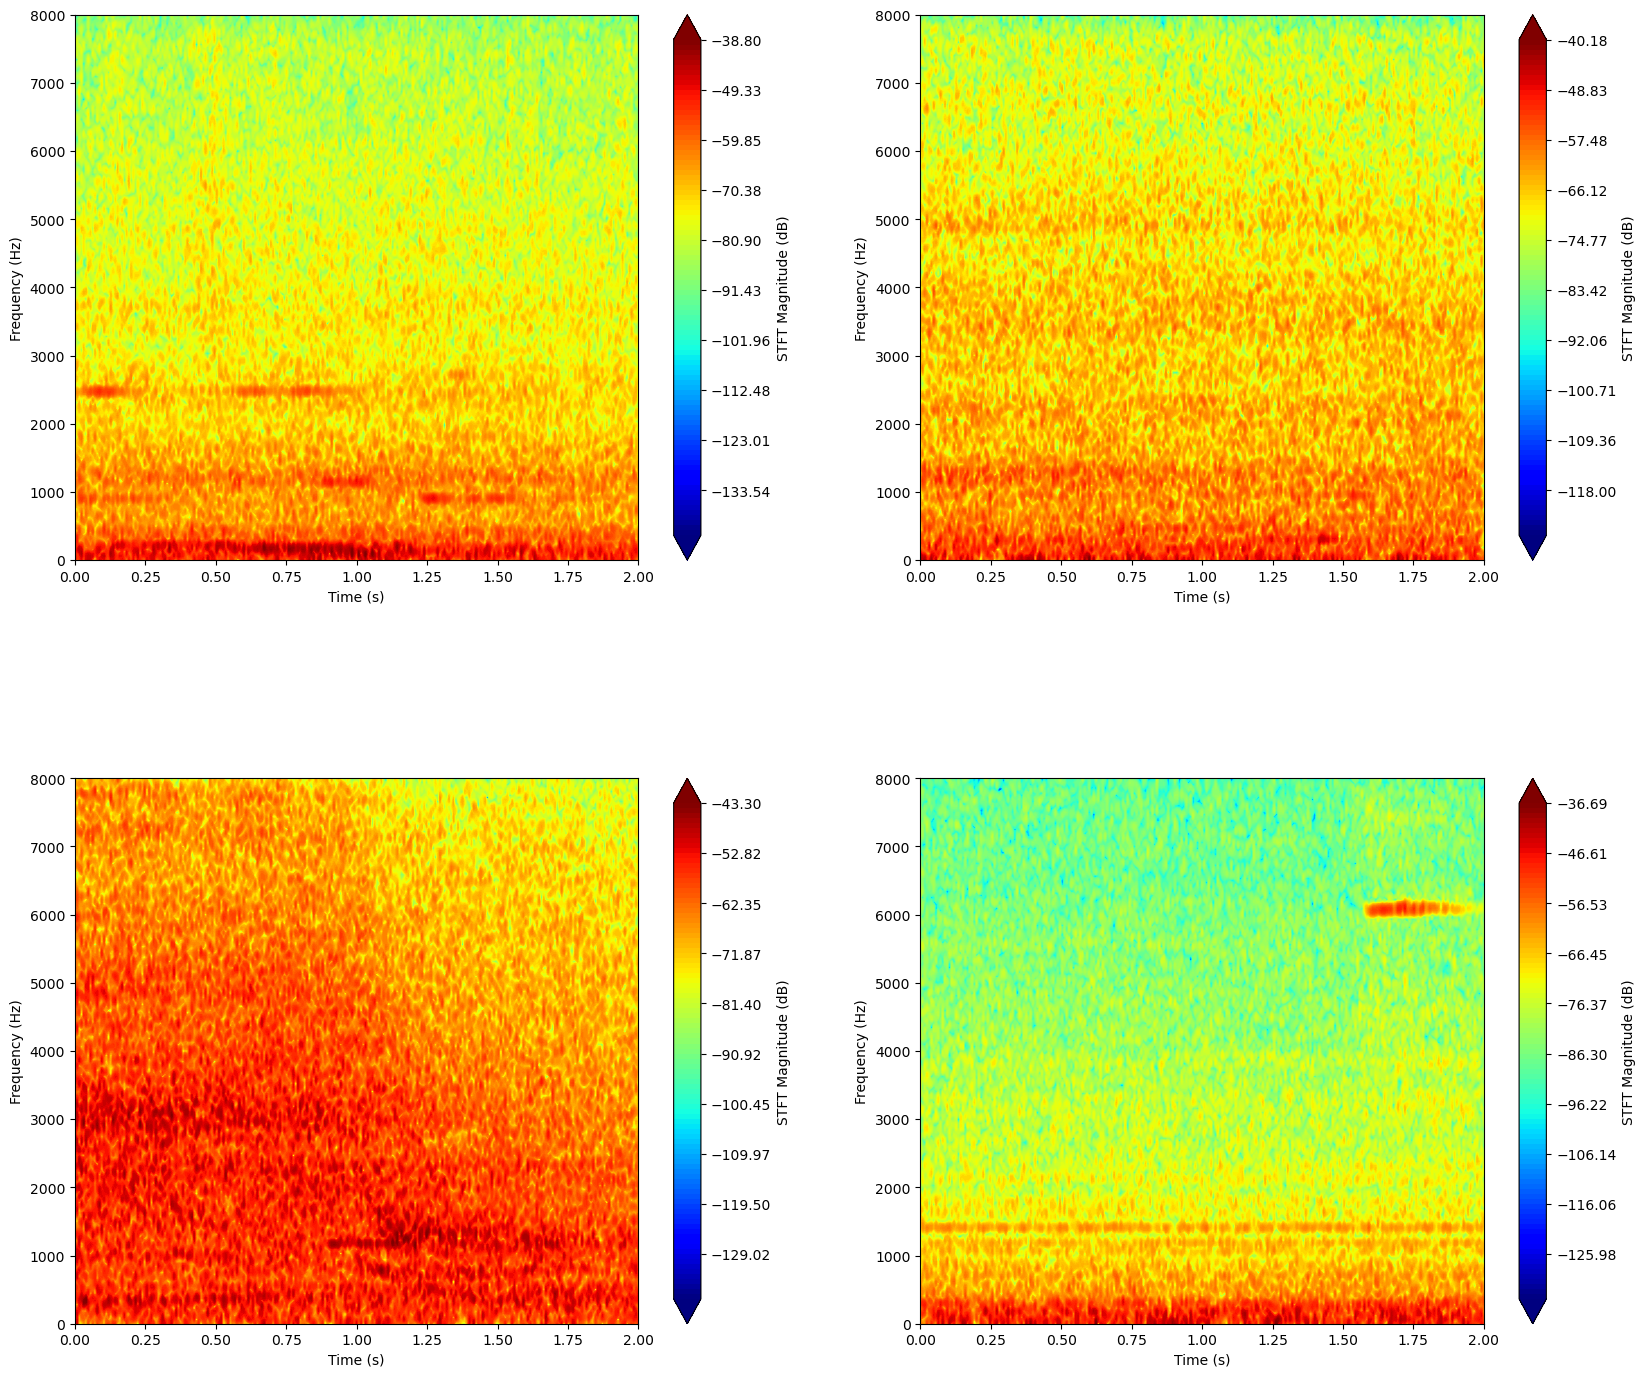

In [232]:
cmap= 'jet'
fig=plt.figure(figsize=(20,17))
plt.subplots_adjust(#left=0.1,
                    hspace=0.4)

for ii in range(2) :
    for jj in range(2) :
        k=2*ii + jj
        
        
        ax = fig.add_subplot(2, 2, k+1)
        mgmin=20*np.log10(spectro_mag[k,:,:].min())
        mgmax=20*np.log10(spectro_mag[k,:,:].max())
        contourlevels = np.arange(mgmin,mgmax,(mgmax-mgmin)/100)
        img= ax.contourf(t, f,
                         #wavelet_mat_mag[k,:,0:time_red:step_time],
                         20*np.log10(spectro_mag[k,:,:]),
                         contourlevels, 
                         extend='both', 
                         cmap=cmap) 
        
        #fig.colorbar(img, ax=ax, format='%+2.0f Mag^(0.5)')
        cbar=fig.colorbar(img, ax=ax)
        cbar.set_label('STFT Magnitude (dB)')
       # ax.set(title=list_soundtype[k])
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Frequency (Hz)')

In [233]:
mgmin,mgmax, k

(-134.91312980651855, -35.692996978759766, 3)

Analyse of the noise. 

<b>Import valve sound</b>

In [235]:
data_s = []

for j in glob.iglob('VAD_valves/*'):
    y, fs = librosa.load(j, sr=16000) # sample 16000 Hz        
    data_s.append(y)     

In [236]:
data_s=np.array(data_s,dtype=object)
np.shape(data_s)

(96,)

In [237]:
#sub_sequence= fs*0.256    # 5 seconds of signal ! 
nfmax= fs*1
sub_sequence= 512*8
#st= 512 #  No overlap ! 
st= sub_sequence
datas_red = np.zeros([len(data_s), sub_sequence], dtype='float32')

for ij in range (0,len(data_s)) :
    
    if len(data_s[ij])>sub_sequence    :  
        
       # print(ij, len(data_s[ij]))      
        frames = util.view_as_windows(data_s[ij], window_shape=(sub_sequence,), step=st) 
        optim_frame_index= np.dot(frames,frames.T).diagonal().argmax()        
       # datas_red.append(frames[optim_frame_index])   # no normalisation...
        datas_red[ij,:]=frames[optim_frame_index]
    
        #for ik in range(len(frames)) :
        #    audio_data_red.append(frames[ik])   # no normalisation... 

In [238]:
ind=[22,   40,  78 , 90]

nfft=512
spectro_cmplx=[]
for ij in range(0, len(ind)) :

    f, t, Zxx = signal.stft(datas_red[ind[ij]], fs=fs, window='hann', nperseg=128, noverlap=64, \
             nfft=nfft, detrend=False, return_onesided=True, \
                 boundary='zeros', padded=True, axis=-1, scaling='spectrum')
    
    spectro_cmplx.append(Zxx)

spectro_cmplx=np.array(spectro_cmplx)   

In [239]:
spectro_mag=np.abs(spectro_cmplx)
spectro_phas=np.angle(spectro_cmplx)

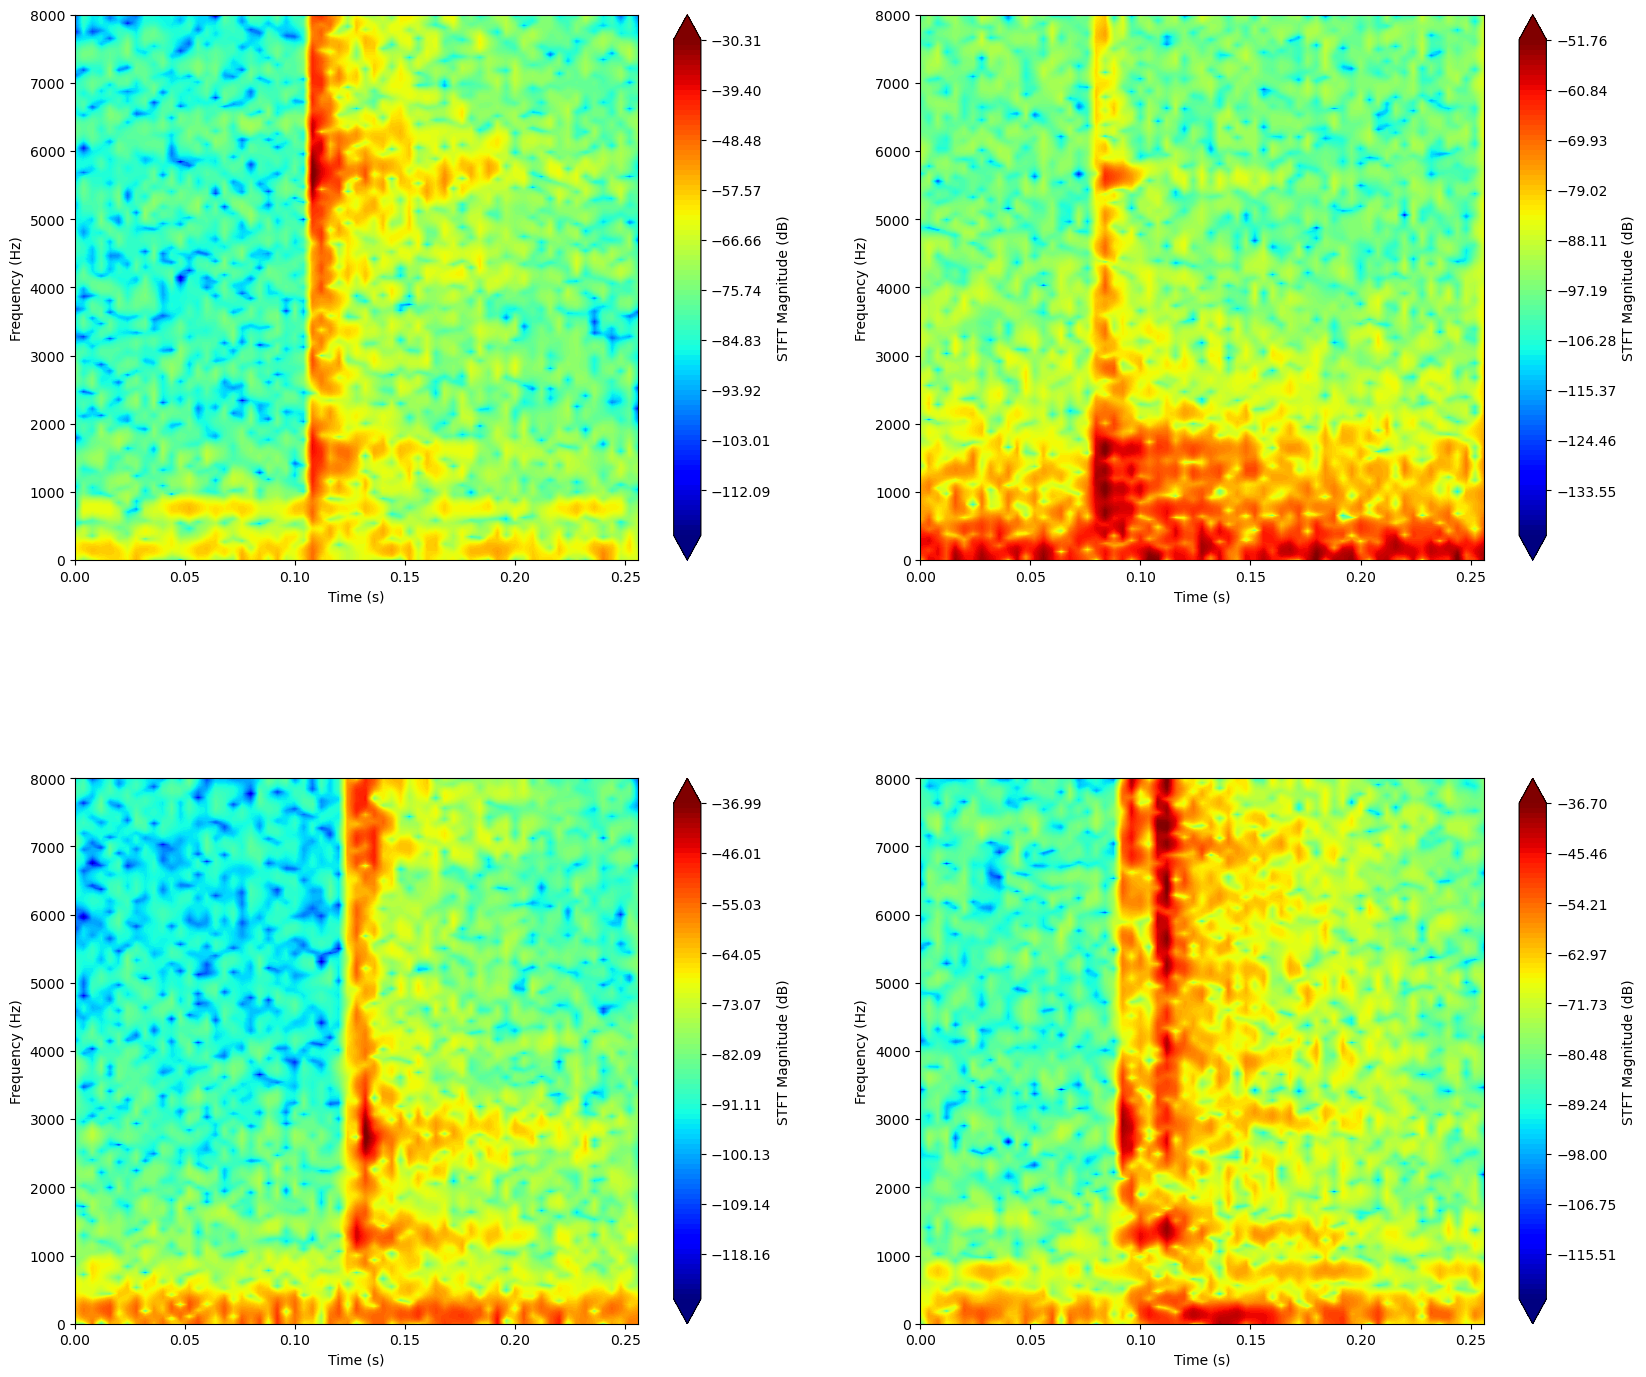

In [240]:
cmap= 'jet'
fig=plt.figure(figsize=(20,17))
plt.subplots_adjust(#left=0.1,
                    hspace=0.4)

for ii in range(2) :
    for jj in range(2) :
        k=2*ii + jj
        
        
        ax = fig.add_subplot(2, 2, k+1)
        mgmin=20*np.log10(spectro_mag[k,:,:].min())
        mgmax=20*np.log10(spectro_mag[k,:,:].max())
        contourlevels = np.arange(mgmin,mgmax,(mgmax-mgmin)/100)
        img= ax.contourf(t, f,
                         #wavelet_mat_mag[k,:,0:time_red:step_time],
                         20*np.log10(spectro_mag[k,:,:]),
                         contourlevels, 
                         extend='both', 
                         cmap=cmap) 
        
        #fig.colorbar(img, ax=ax, format='%+2.0f Mag^(0.5)')
        cbar=fig.colorbar(img, ax=ax)
        cbar.set_label('STFT Magnitude (dB)')
       # ax.set(title=list_soundtype[k])
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Frequency (Hz)')

### Beamforming

In [241]:
#==========================================================================
Main_revopt=np.loadtxt('reWopt_valve000deg_main_beam_v20.txt');   # real part of optimal filters  
Main_imvopt=np.loadtxt('imWopt_valve000deg_main_beam_v20.txt');   # imaginary part of optimal filter
#---
Noise_revopt=np.loadtxt('reWopt_valve000deg_noise_beam_v20.txt');   # real part of optimal filters  
Noise_imvopt=np.loadtxt('imWopt_valve000deg_noise_beam_v20.txt');   # imaginary part of optimal filter

In [242]:
Beam_Main= Main_revopt  +1j*Main_imvopt
Beam_Noise= Noise_revopt +1j*Noise_imvopt

In [243]:
np.shape(Beam_Main), np.shape(Beam_Noise)
# #----------------------------------
# extract parameters
#----------------------------------
nfft=len(Main_revopt[:,1])       #   nfft:  Length of double-sided beamforming filters 
nmic_max=len(Main_revopt[1,:])
nfft, nmic_max

(512, 8)

In [244]:
#-----------------------------------------------------
#  Reading 8 channels 
#-----------------------------------------------------
#[mics_signals,Fs] = audioread('valve_id00_n_00000117.wav'); #
[mics_signals,Fs] = sf.read('valve_id00_n_00000117.wav'); #
#[filepath,name,ext] = fileparts('valve_id00_n_00000117.wav');

#=====================================
#  Import all microphones audio signals  
#=====================================
#-----------------------------------------------------
#[mics_signals,Fs] = audioread('valve_id00_n_00000117.wav'); #
#[filepath,name,ext] = fileparts('valve_id00_n_00000117.wav');
#
# [mics_signals,Fs] = audioread('valve_id00_n_00000000.wav'); #
# [filepath,name,ext] = fileparts('valve_id00_n_00000000.wav');
#-----------------------------------------------------
# [mics_signals,Fs] = audioread('valve_id06_n_00000048.wav'); #
# [filepath,name,ext] = fileparts('valve_id06_n_00000048.wav');
#
# [mics_signals,Fs] = audioread('valve_id06_abn_00000008.wav'); #
# [filepath,name,ext] = fileparts('valve_id06_abn_00000008.wav');
#
# # [mics_signals,Fs] = audioread('valve_id06_abn_00000008.wav'); #
# # [filepath,name,ext] = fileparts('valve_id06_abn_00000008.wav');

In [245]:
np.shape(mics_signals), Fs

((160000, 8), 16000)

256 <class 'numpy.ndarray'>


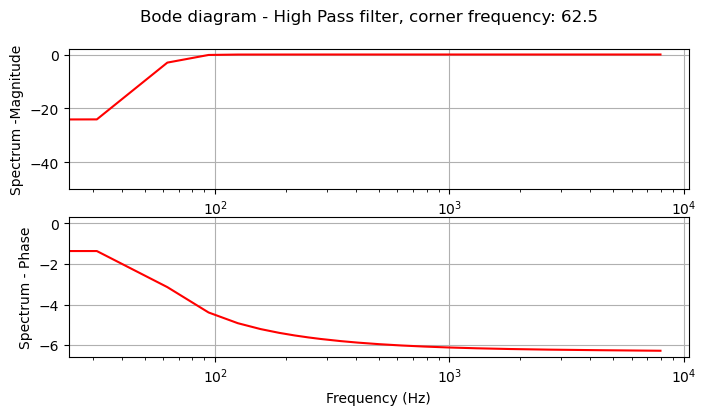

In [246]:
#--------------------------------------------------------------
# Filtering very low frequency with high pass filters at 60 Hz.
# Butterworth order 4
#--------------------------------------------------------------
#import math   
#----
xfr= np.arange(0, nfft//2, 1, dtype=int)
xfr=xfr*Fs/nfft
#----------------------
order=4
normal_cutoff=2*Fs/nfft
#----
b, a = signal.butter(order, normal_cutoff, btype='highpass', analog=False, output='ba', fs=Fs)
wbutt, hbutt = signal.freqz(b, a,  worN=len(xfr),fs=Fs)
#----
print(len(wbutt), type(hbutt))
fig, axs = plt.subplots(2, figsize=(8,4))
fig.suptitle("Bode diagram - High Pass filter, corner frequency: "+ str(normal_cutoff) )
axs[0].semilogx(xfr,20*np.log10(abs(hbutt[0:nfft//2])),color='r')
axs[0].set_xlabel("Frequency (Hz)") 
axs[0].set_ylabel("Spectrum -Magnitude")
axs[0].set_ylim(-50,2)
axs[0].grid()
#------------------------------------------------------------

axs[1].semilogx(xfr,np.unwrap(np.angle(hbutt[0:nfft//2])),color='r')
axs[1].set_xlabel("Frequency (Hz)") 
axs[1].set_ylabel("Spectrum - Phase")
axs[1].grid()

In [247]:
def beamforming_v1(mic_channels_frames, Beam_Main, Beam_Noise, nmic_max, nfft, b, a) :  #, spec_filter):

        xm=np.zeros([nmic_max,nfft], dtype='float')   # real ! 
        Xm=np.zeros([nmic_max,nfft], dtype='complex')  # Xm= fft(xm)  complex ! 
        Y_noise=np.zeros([nmic_max,nfft], dtype='complex')  # Ym= fft(xm)  complex ! 
        Y_Main=np.zeros([nmic_max,nfft], dtype='complex')  # Ym= fft(xm)  complex ! 


        for imic in range(0,nmic_max) :
            xm[imic,:]= mic_channels_frames[:,imic]                     # mth frame mic 1
            xm[imic,:]= scipy.signal.filtfilt(b,a,sc*xm[imic,:]*window_frame )         # high pass filter 60 Hz
   #   All Frames FFT ! 
            Xm[imic,:]= np.fft.fft(xm[imic,:]);
   #   Beamforming filters
            Y_noise[imic,:]= np.conj(Beam_Noise[:,imic])*Xm[imic,:]       #  Secondary channel filters all mics
            Y_Main[imic,:] = np.conj(Beam_Main[:,imic])*Xm[imic,:]        #  Main Beamformer filters all mics     
   #=====================================================
   #   SUM filtered microphones signals   
   #   Frequency domain
   #======================================================  
        Ym =     sum(Y_Main[:,0:nfft])   # sum of all filtered mics frames speech
        Nm =     sum(Y_noise[:,0:nfft])    # sum of all filtered mics frames noise 
   #------------------- Saving FFTs mag and phase
        Xm1= Xm[0,:]     #   Single Microphone= mic1 - for comparison purposes and for testing overlap-add  
    
        return Ym, Nm, Xm1

In [248]:
def NRgain_em(Ym, Ym_previous, G_previous, sigma2_noise_rho,alpha) :  #
    
       #-------------------------------------------------
       # Ephraim&Malah's noise suppression Gain   MMSE log spectral 
       #-------------------------------------------------
       #  If N_hist=1;  No "history" we use "instant" sigma2_noise 
       #-------------------------------------------------

    G=np.zeros([nfft],  dtype='float')    # we collect Gain of all frames for validation purposes.

    #  aposteriori_SNR(w)    noisy speech PSD(w)/mean(noise PSD(w)) 
    aposteriori_SNR= abs(Ym)**2/sigma2_noise_rho         
                                                     
    #  estimation of apriori SNR 
    Apost_SNR=aposteriori_SNR-1
    Apost_SNR[Apost_SNR<0] = 0       
    
    apriori_SNR= alpha*( abs( G_previous*Ym_previous )**2)/sigma2_noise_rho + (1-alpha)*Apost_SNR  
   #----------------------------------                                     
    nu= apriori_SNR*aposteriori_SNR/(1 + apriori_SNR)        #  nu(w)
   #-----------------------------------------------------------
   # Bounding nu(1:nfft) important update if no VAD is used ! 
   # prevents EM supression rule from "crashing" when background noise is quiet
   # Current limit is empirical. Reduce the value in silence or
   # very quiet back groundnoise
   #-----------------------------------------------------------
    thres_nu=750
    nu[nu>thres_nu]=thres_nu  # Important for quiet environments !
   #=======================================================================
   # Ephraim Malah Gain
   #======================================================================= Gm(w)    
    G=  0.5*(np.sqrt(np.pi*nu)/ aposteriori_SNR )*(np.exp(-nu/2)*(  (1 + nu)*iv(0,nu/2) + nu*iv(1,nu/2)  ))    #  Gm(w)   
   # =======================================================================
   # GAIN Functions for Ephraim-Malah  - Estimation of "clean" speech  S 
   # Time domain output.
   # =======================================================================  
    
    return G

In [249]:
#===================================
#  Frequency implementation - Frame by frame
#  Sliding a 32 ms window, nfft=512 points with 66# overlap. 
#  No padding -  Two-sided fft 
#===================================

#--------------------            
Nsig=len(mics_signals[:,1]);  #  length of signals.  All channel signals have the same length ! 
                                 #  If signals have different lengths, select minimum length. 
#--------------------
M = nfft;             # (effective) frame length
R=np.floor(M/3).astype('int')  ;       # R= shift  33#  overlap=66# or 50# works well.  
#--------------------
Tframe=M*1/Fs   ;                 #  Frame time length
Nframes = 1 + np.floor((Nsig-M)/R).astype('int');  # Total number of frames 
#--------------------
window_frame= np.hanning(M)#[:-1]       # window for each frame
window_frame =np.hamming(M)#[:-1]           # Hamming window (works well). 
#window_frame =np.ones(M,1);         # NO WINDOW 
#============================
#spectrum_F= np.empty([nfft//2]).astype(complex)  
sf=np.zeros([nfft//2], dtype=float)
#GSC_output =               np.zeros(1,Nsig + nfft);
#MainBeamformer_output =    np.zeros(1,Nsig + nfft);            # allocate output vector (array output)
#NoiseBeamformer_output =   np.zeros(1,Nsig + nfft);            # allocate output vector (array output)
#Single_microphone_output=  np.zeros(1,Nsig + nfft);            # allocate output vector (one mic only)                                                         # Default:  mic=1 
#===========================

In [255]:
#===========================================================
#  Initialization for GSC  Wiener Gain or ML gain functions 
#===========================================================
G=np.zeros([Nframes,nfft],  dtype='float');    # we collect Gain of all frames for validation purposes.
N=np.zeros([Nframes,nfft], dtype='complex');    # we collect all Noise frames for validation purposes
#---------------------------
s_em  = np.zeros([Nsig + nfft], dtype='float');       # allocate output vector Ephraim&Malah gain
s_wie = np.zeros([Nsig + nfft], dtype='float');       # allocate output Wiener Gain signal estimate 
y=        np.zeros([Nsig + nfft], dtype='float');       # allocate output vector (Speech channel)
n=        np.zeros([Nsig + nfft], dtype='float');       # allocate output vector (Noise Channel)
MainBeamformer_output    = np.zeros([Nsig + nfft], dtype='float')
NoiseBeamformer_output   = np.zeros([Nsig + nfft], dtype='float')
Single_microphone_output = np.zeros([Nsig + nfft], dtype='float')
index=np.zeros([Nframes,nfft], dtype='int')  
outindex=np.zeros([Nframes,nfft], dtype='int') 
#============================================================
#============================================================
#  Ephraim-Malah suppression rule Gain:  G_m(w)   in the frequency domain
#  Initialization of Gain frame 1 
#  Frame One
#------------------------------------------------------------
G[0,:]=1*np.ones(nfft);    
G_previous=G[0,:];
#----- speech, noise frame number one ----- 
N[0,:]= 0.1*np.ones(nfft);      # initialization of Noise FFT  - frame one. 
Ym_previous=0.1*np.ones(nfft);
#---   parameters
alpha=0.85;   #  SNRprior parameter 
N_hist=24;    #  Building noise "history" (1 frame or a few frames) 
rho=0;        #  regularization sigma2_noise. Should be zero ! 
sc=1
#====================================  START   ================== 
#
#=================================================================
# sliding a nfft=512 window on the full recordings with overlap= R
#=================================================================

for m in range(1,Nframes) :
  
    index[m,:] = range((m-1)*R+1,min((m-1)*R+M+1,Nsig) )        # indices for the mth frame  
    
    mic_channels_frames= mics_signals[index[m,:],:]  
    
    # beamforming function: returns (1) Main beam channel (2) "noise" channel 
    [Ym, Nm, Xm1]=beamforming_v1(mic_channels_frames, Beam_Main, Beam_Noise, nmic_max, nfft, b, a)
    #--------------
    N[m,:] = Nm 
    #--------- 
    #magYm= abs(Ym);                  # Magnitude of Beamformer output
    phaseYm= np.angle(Ym);           # Phase of Beamformer output.
    #------------------ PSD   (times number of bins: not averaged); 
    PhiYY= abs(Ym)**2; 
    PhiNN= abs(N[m,:])**2; 
   #==========================================
   #   sigma2_noise:  Mean noise PSD(w) over a few frames (short history length N_hist) 
   #   Noise is supposed to be Gaussian with mean=0. 
   #========================================== 
    if m>N_hist:
        sigma2_noise_rho=np.mean((abs(N[m-N_hist:m,:])**2)) + rho # rho should be 0, except for testing the algorithm
    else:
        sigma2_noise_rho=np.mean((abs(N[m-1:m,:])**2)) + rho
        
   #============================================= 
   # compute Ephraim Malah NR Gain 
   #=============================================
    GEM= NRgain_em(Ym, Ym_previous, G_previous, sigma2_noise_rho, alpha)
    G[m,:]=GEM
    Ym_previous=Ym                             #   Reinitialization of Y[m-1]
    G_previous=G[m,:]                          #   Reinitialization of G[m-1,:]
    absSem= G[m,:]*abs(Ym)                     #   Magnitude Clean speech   
    Sem= absSem*np.exp(1j*phaseYm)             #   Clean speech 
   #============================================= 
   # compute Wiener NR Gain 
   #=============================================    
   #=== back to the time domain 
    sem  = window_frame*np.real(np.fft.ifft(Sem))                      # FFT inverse transform of "clean" speech  
   # "speech_frame" and "noise_frame" were used for implementing NR frame by frame. 
   # We reconstruct Main Beamformer channel and Secondary "Noise" Channel for testing signal integrity
    xm1= window_frame*np.real(np.fft.ifft(Xm1));                    # frame by frame reconstruction: microphone n.1 
    ym = window_frame*np.real(np.fft.ifft(Ym));                     # frame by frame reconstruction: nbeamformer output
    nm = window_frame*np.real(np.fft.ifft(N[m,:]));                 # frame by frame reconstruction: noise channel
   #=======================================================================
   # ADDING CLEAN SPEECH FRAMES to OUTPUT (with overlap R)
    outindex[m,:] =range((m-1)*R+1,min((m-1)*R+M+1,Nsig) )  
   #=======================================================================  
   #--------------------
   # output= "clean" speech signal Ephraim-Malah 
    s_em[outindex[m,:]]                      = s_em[outindex[m,:]] + sem          
   #---  main beamformer, single microphone, and secondary (or noise) channel. 
    MainBeamformer_output[outindex[m,:]]     = MainBeamformer_output[outindex[m,:]]   + ym
    NoiseBeamformer_output[outindex[m,:]]    = NoiseBeamformer_output[outindex[m,:]]    + nm  
    Single_microphone_output[outindex[m,:]]  = Single_microphone_output[outindex[m,:]]  + xm1 


# adjust signal amplitude. 
ampbo=2
ampgsc=2.5

scipy.io.wavfile.write("Mic1.wav", Fs, Single_microphone_output)
scipy.io.wavfile.write("Beamformer_Output.wav", Fs, ampbo*MainBeamformer_output)
scipy.io.wavfile.write("GSC_EM_Gain.wav", Fs, ampgsc*s_em)




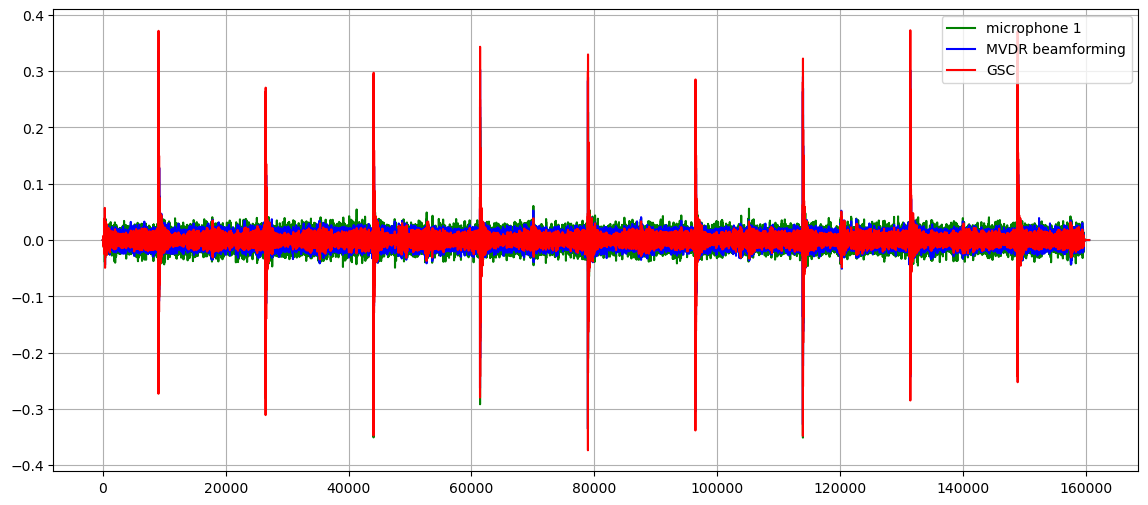

In [262]:
fig=plt.figure(figsize=(14,6))
line1, = plt.plot(Single_microphone_output,'g', label="microphone 1")
line2, = plt.plot(ampbo*MainBeamformer_output,'b', label='MVDR beamforming')
line3, = plt.plot(ampgsc*s_em,'r', label='GSC')
plt.grid()
plt.legend(handles=[line1,line2,line3], loc='upper right')  #


###   Noise Reduction with VAD 

In [263]:
#============================================================
#  Ephraim-Malah suppression rule Gain:  G_m(w)   in the frequency domain
#  Initialization of Gain frame 1 
#  Frame One
#------------------------------------------
G[0,:]=1*np.ones(nfft);    
#----- speech, noise frame number one ----- 
N[0,:]= 0.1*np.ones(nfft);      # initialization of Noise FFT  - frame one. 
Ym_previous=0.1*np.ones(nfft);
#---   parameters
alpha=0.95;   #  SNRprior parameter 
N_hist=24;    # Building noise "history" (1 frame or a few frames) 
rho=0.01;        # regularization sigma2_noise. Should be zero ! 
sc=1

In [419]:
#===========================================================
#  Initialization for GSC  Wiener Gain or ML gain functions 
#===========================================================
G=np.zeros([Nframes,nfft],  dtype='float');    # we collect Gain of all frames for validation purposes.
Real_NOISE=np.zeros([Nframes,nfft], dtype='complex')
N=np.zeros([Nframes,nfft], dtype='complex')
#---------------------------
s_em=     np.zeros([Nsig + nfft], dtype='float');       # allocate output vector Ephraim&Malah gain
s_em_ext= np.zeros([Nsig + nfft], dtype='float');       # allocate output Wiener Gain signal estimate 
y=        np.zeros([Nsig + nfft], dtype='float');       # allocate output vector (Speech channel)
n=        np.zeros([Nsig + nfft], dtype='float');       # allocate output vector (Noise Channel)
MainBeamformer_output    = np.zeros([Nsig + nfft], dtype='float')
NoiseBeamformer_output   = np.zeros([Nsig + nfft], dtype='float')
Single_microphone_output = np.zeros([Nsig + nfft], dtype='float')

#=============================================================
#  Ephraim-Malah suppression rule Gain:  G_m(w)   in the frequency domain
#  Initialization of Frame One
#-------------------------------------------------------------
G[0,:]=1*np.ones(nfft)   
N[0,:]= 0.1*np.ones(nfft)     # initialization of Noise FFT  - frame one. 
Real_NOISE[0,:]= 0.1*np.ones(nfft)
NR_type='_no_vad_'
Ym_previous=0.1*np.ones(nfft)
#---   parameters
#---  No VAD
#alpha=0.85;   #  SNRprior parameter No VAD
#N_hist=24;    # Building noise "history" (1 frame or a few frames) 
#--- With VAD 
alpha=0.85;    #  SNRprior parameter No VAD
N_hist=8;      #  WITH VAD   short noise "history"
rho=0;         #  regularization sigma2_noise. Should be zero ! 
sc=1
#====================================  START   ==================
xm=np.zeros([nmic_max,nfft], dtype='float')   # real ! 
Xm=np.zeros([nmic_max,nfft], dtype='complex')  # Xm= fft(xm)  complex ! 
Y_noise=np.zeros([nmic_max,nfft], dtype='complex')  # Ym= fft(xm)  complex ! 
Y_Main=np.zeros([nmic_max,nfft], dtype='complex')  # Ym= fft(xm)  complex ! 
y_v=np.zeros([1,nfft], dtype='int')


index=np.zeros([Nframes,nfft], dtype='int')  # Xm= fft(xm)  complex ! 
outindex=np.zeros([Nframes,nfft], dtype='int')  # Xm= fft(xm)  complex ! 


VAD=np.loadtxt('VAD_valve_p_beamformer_out.txt')


pnois=0




for m in range(1,Nframes) :
   
  
    index[m,:] = range((m-1)*R+1,min((m-1)*R+M+1,Nsig) )        # indices for the mth frame  
   #--------------------------
   #  All microphones inputs
   #  - Time Domain frames 
   #  - HP Filtering 
   #  - Scaling-Windowing Time Domain frames before applying beamforming filters 
   #--------------------------
    for imic in range(0,nmic_max) :
               xm[imic,:]= mics_signals[index[m,:],imic]                     # mth frame mic 1
               xm[imic,:]= scipy.signal.filtfilt(b,a,sc*xm[imic,:]*window_frame )         # high pass filter 60 Hz
   #   All Frames FFT ! 
               Xm[imic,:]= np.fft.fft(xm[imic,:]);
   #   Beamforming filters
               Y_noise[imic,:]= np.conj(Beam_Noise[:,imic])*Xm[imic,:]       #  Secondary channel filters all mics
               Y_Main[imic,:] = np.conj(Beam_Main[:,imic])*Xm[imic,:]        #  Main Beamformer filters all mics     
   #=====================================================
   #   SUM filtered microphones signals   
   #   Frequency domain
   #======================================================  
    Ym =     sum(Y_Main[:,0:nfft])   # sum of all filtered mics frames speech
    N[m,:] = sum(Y_noise[:,0:nfft])    # sum of all filtered mics frames noise 
   #------------------- Saving FFTs mag and phase
    Xm1= Xm[0,:]     #   Single Microphone= mic1 - for comparison purposes and for testing overlap-add 

   #--------- 
    magYm= abs(Ym);                  # Magnitude of Beamformer output
    phaseYm= np.angle(Ym);           # Phase of Beamformer output.
   #------------------ PSD   (times number of bins: not averaged); 
    PhiYY= abs(Ym)**2; 
   # PhiNN= abs(N[m,:])**2; 

   #==========================================
   #   sigma2_noise:  Mean noise PSD(w) over a few frames (short history length N_hist) 
   #   Noise is supposed to be Gaussian with mean=0. 
   #==========================================
    y_v= np.ones(nfft)  # DEFAULT CURRENT FRAME  VAD=1 
  
   
    if VAD[m]<0.5:
        pnois=pnois+1
        y_v= np.zeros([1,nfft], dtype='int')     # CURRENT FRAME  VAD=0 
        #=========================
        #   Option I:  GSC - Two channels   Beamformer output + Noise
        #   channel output
        #========================
       # Real_NOISE[pnois,:]=  N[m,:] # noise channel
       # NR_type='-nr_vad';
        #=========================
        #   Option II:  One channel only ! Main beamformer output
        #========================
        Real_NOISE[pnois,:]= Ym  # noise from main beamformer output           
        NR_type='_vad_'

   #========================
   #  sigma2_noise:  Mean noise PSD(w) over a few frames (short history length N_hist) 
   #   Noise is supposed to be Gaussian with mean=0. 
   #========================
    if pnois>N_hist :
        sigma2_noise_rho=np.mean((abs(Real_NOISE[pnois-N_hist:pnois,:])**2))  + rho
    else :   
        sigma2_noise_rho=np.mean((abs(Real_NOISE[pnois-1:pnois,:])**2)) + rho      
   #========   Classic Ephraim Malah  =========== 
   #-------------------------------------------------
   # Ephraim&Malah's noise suppression Gain   MMSE log spectral 
   #-------------------------------------------------
   #  If N_hist=1;  No "history" we use "instant" sigma2_noise 
   #-------------------------------------------------
    aposteriori_SNR= abs(Ym)**2/sigma2_noise_rho         
                                                     
    #  estimation of apriori SNR
    Apost_SNR=aposteriori_SNR-1
    Apost_SNR[Apost_SNR<0] = 0       
    
    apriori_SNR= alpha*( abs( G[m-1,:]*Ym_previous )**2)/sigma2_noise_rho + (1-alpha)*Apost_SNR  
   #----------------------------------                                     
    nu= apriori_SNR*aposteriori_SNR/(1 + apriori_SNR)        #  nu(w)
   #-----------------------------------------------------------
   # Bounding nu(1:nfft) important update  end of November 2023
   # prevents EM supression rule from "crashing" when background noise is quiet
   # Current limit is empirical. Reduce the value in silence or
   # very quiet back groundnoise
   #-----------------------------------------------------------
    thres_nu=1000   
    nu[nu>thres_nu]=thres_nu  # Important for quiet environments !
   #=======================================================================
   # Ephraim Malah Gain
   #======================================================================= Gm(w)    
    G[m,:]=  0.5*(np.sqrt(np.pi*nu)/ aposteriori_SNR )*(np.exp(-nu/2)*(  (1 + nu)*iv(0,nu/2) + nu*iv(1,nu/2)  ))    #  Gm(w)   
   # =======================================================================
   # GAIN Functions for Ephraim-Malah  - Estimation of "clean" speech  S 
   # Frequency domain
   # =======================================================================  
    Ym_previous=Ym                             #   Reinitialization of Y(m-1)
    absSem= G[m,:]*abs(Ym)                     #   Magnitude Clean speech   
    Sem= absSem*np.exp(1j*phaseYm)             #   Clean speech 
   #=== back to the time domain
    sem  = window_frame*np.real(np.fft.ifft(Sem))                      # FFT inverse transform of "clean" speech  
   #=======================================================================
   # ADDING CLEAN SPEECH FRAMES to OUTPUT 
    outindex[m,:] =range((m-1)*R+1,min((m-1)*R+M+1,Nsig) )  
   #=======================================================================  
  # "speech_frame" and "noise_frame" were used for implementing NR frame by frame. 
  # We reconstruct Main Beamformer channel and Secondary "Noise" Channel for testing signal integrity
  # with frames,  windowing, fft, ifft, overlap-add. 
    xm1= window_frame*np.real(np.fft.ifft(Xm1));                    # frame by frame reconstruction: microphone n.1 
    ym = window_frame*np.real(np.fft.ifft(Ym));                     # frame by frame reconstruction: nbeamformer output
    nm = window_frame*np.real(np.fft.ifft(N[m,:]));                 # frame by frame reconstruction: noise channel
  #--------------------
  # output= "clean" speech signal Ephraim-Malah 
    s_em[outindex[m,:]]                      = s_em[outindex[m,:]] + sem;          
  #---  main beamformer, single microphone, and secondary (or noise) channel. 
    MainBeamformer_output[outindex[m,:]]     = MainBeamformer_output[outindex[m,:]]   + ym; 
    NoiseBeamformer_output[outindex[m,:]]    = NoiseBeamformer_output[outindex[m,:]]    + nm;  
    Single_microphone_output[outindex[m,:]]  = Single_microphone_output[outindex[m,:]]  + xm1; 



ampbo=2
ampgsc=2.5

scipy.io.wavfile.write("Mic1.wav", Fs, Single_microphone_output)
scipy.io.wavfile.write("Beamformer_Output.wav", Fs, ampbo*MainBeamformer_output)
scipy.io.wavfile.write("GSC_EM_Gain"+NR_type+".wav", Fs, ampgsc*s_em)


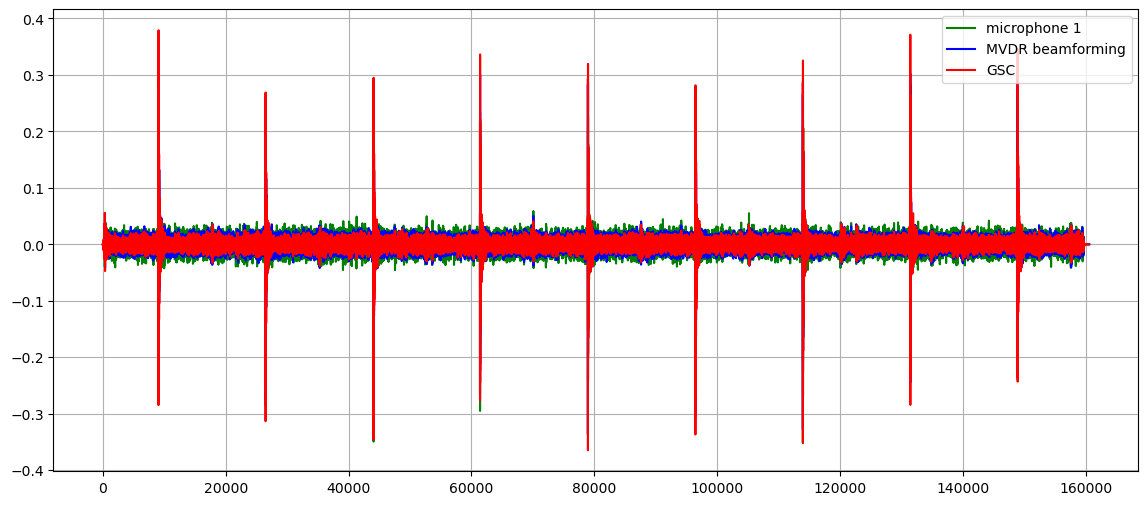

In [420]:
fig=plt.figure(figsize=(14,6))
line1, = plt.plot(Single_microphone_output,'g', label="microphone 1")
line2, = plt.plot(ampbo*MainBeamformer_output,'b', label='MVDR beamforming')
line3, = plt.plot(ampgsc*s_em,'r', label='GSC')
plt.grid()
plt.legend(handles=[line1,line2,line3], loc='upper right')  #

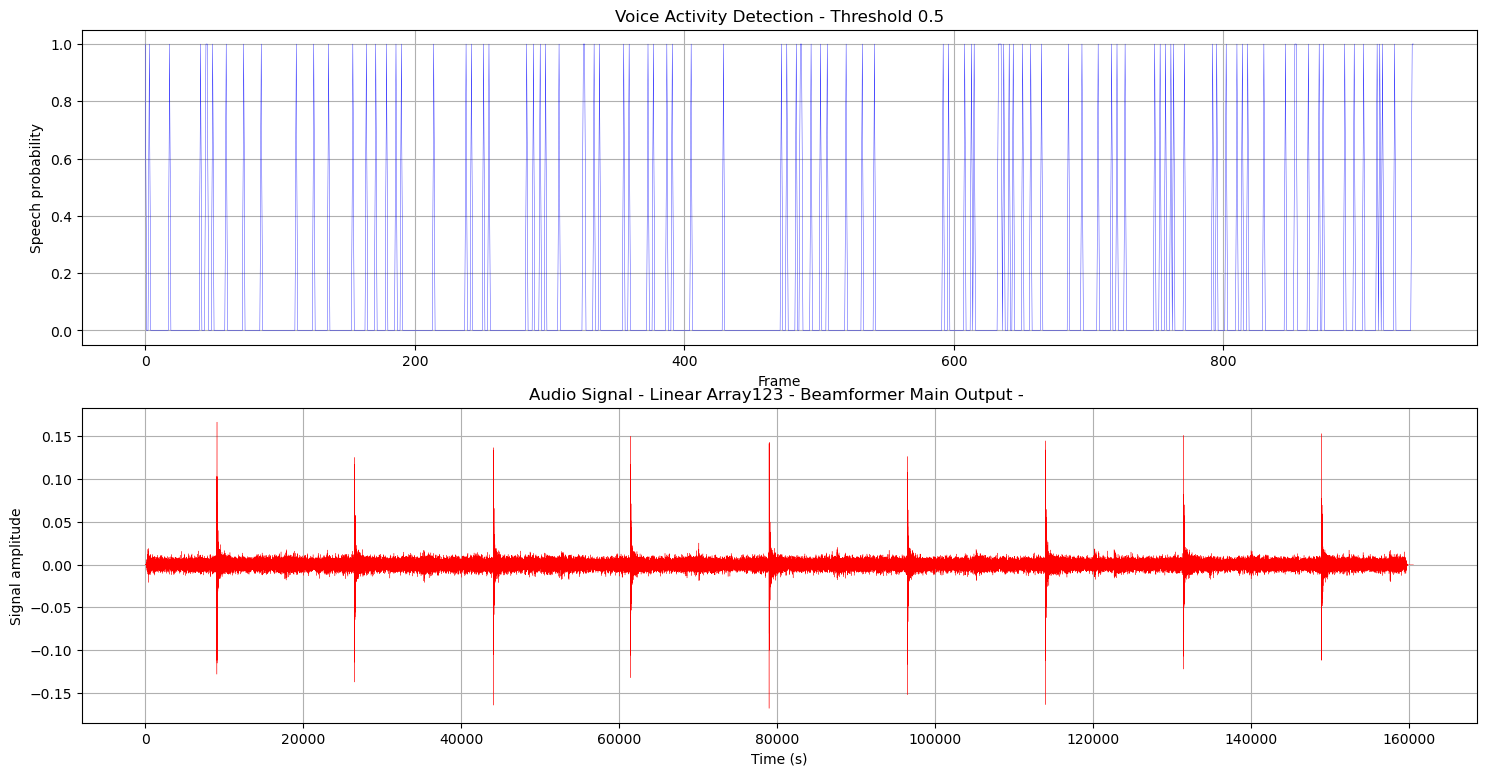

In [339]:
fig=plt.figure(figsize=(18,9))

ax = fig.add_subplot(2, 1, 1)
#  RGBA tuple  ((0,1,0,1))    Alpha is transparency from 0 to 1   
plt.plot(VAD,'b',linewidth=0.25)
#plt.plot(np.floor(s+0.9),'b',linewidth=0.5)
#plt.plot(t,s,'g',linewidth=1)
#plt.plot(t,s[:,1],'b',linewidth=0.5)
#ax.set_xlim(0, len(t))
ax.set_xlabel('Frame')
ax.set_ylabel('Speech probability')
#plt.title('Audio recording: '+str(ind[0])+' Class: '+str(labels[ind[0]]))
plt.title('Voice Activity Detection - Threshold 0.5')
ax.grid()

ax = fig.add_subplot(2, 1, 2)
#  RGBA tuple  ((0,1,0,1))    Alpha is ytransparecy from 0 to 1   
plt.plot(MainBeamformer_output ,'r',linewidth=0.25)
#plt.plot(frames_test,'r',linewidth=0.25)

#ax.set_xlim(0, len(t_audio))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
#plt.title('Audio recording - : '+str(ind[1])+' Class: '+str(labels[ind[1]]))
#plt.title('Audio Signal - Linear Array123 - Beamformer Main Output - '+audio_title)
#plt.title('Audio Signal - Linear Array123 - Beamformer Main Output - '+audio_title)
plt.title('Audio Signal - Linear Array123 - Beamformer Main Output - ')
ax.grid()


## APPENDIX - Valve Activity Detection

In [278]:
import time

classes = []
label_number=0
labels = []
file_names = []
data_noise = []

#for filepath in glob.iglob('SourceNoise/*'):
#  classes.append(filepath[8:])
print('  ')
print('running....')
print('  ')
download_audio_start= time.time()   

#for i in classes:
 #   print("Class = "+i+", Label = "+str(label_number))

for j in glob.iglob('ValveNoiseFrames/*'):
#for j in glob.iglob('clean_testset_wav/*'):    
   

        #y, fs = librosa.load(j, sr=44100) # sample 44.1 kHz 
        #y, fs = librosa.load(j, sr=22050) # sample 22.050 kHz 
    y, fs = librosa.load(j, sr=16000) # sample 16000 Hz
        
    data_noise.append(y/max(abs(y)))                #  

    #label_number = label_number + 1

download_audio_end= time.time()   
print('  ')
print(f'Download audio computing time (s) {download_audio_end - download_audio_start:.2f}') 

  
running....
  
  
Download audio computing time (s) 13.35


In [279]:
classes = []
label_number=0
labels = []
file_names = []
data_valve = []

#for filepath in glob.iglob('SourceNoise/*'):
#  classes.append(filepath[8:])
print('  ')
print('running....')
print('  ')
download_audio_start= time.time()   

#for i in classes:
 #   print("Class = "+i+", Label = "+str(label_number))

for j in glob.iglob('ValveSoundFrames/*'):
#for j in glob.iglob('clean_testset_wav/*'):    
   

        #y, fs = librosa.load(j, sr=44100) # sample 44.1 kHz 
        #y, fs = librosa.load(j, sr=22050) # sample 22.050 kHz 
    y, fs = librosa.load(j, sr=16000) # sample 16000 Hz
        
    data_valve.append(y/max(abs(y)))                #  

    #label_number = label_number + 1

download_audio_end= time.time()   
print('  ')
print(f'Download audio computing time (s) {download_audio_end - download_audio_start:.2f}') 

  
running....
  
  
Download audio computing time (s) 1.15


In [280]:
data_valve=np.array(data_valve)
data_noise=np.array(data_noise)

In [281]:
from scipy import signal
from skimage import util
import scipy.signal

# Fonction FFT spectrum. Includes [b,a] signal filter in the "time" domain. 
def FFT_spectrum_ba(Y, NFFT, SubSeq_L, st, win,b,a) :  #, spec_filter):
    spectrum_F= np.empty([len(Y),  NFFT//2]).astype(complex)  
    for j in range(0,len(Y)):  
        # AVERAGING on SubSequence length SubSeq_L
        frames = util.view_as_windows(Y[j][0:SubSeq_L], window_shape=(NFFT,), step=st)
        # AVERAGING on full length DNA sequences
        #frames = util.view_as_windows(Y[j], window_shape=(NFFT,), step=st)
        #frames_win=scipy.signal.filtfilt(b, a,frames*win) #  WINDOWING
        frames_win= frames*win
        
        
        spectrum_cplx  = np.fft.fft(frames_win)   # DOUBLE SIDED spectrum !!   
        # Average all frames FFT
        spectrum_F[j][:]= np.mean(spectrum_cplx, axis=0)[0:NFFT//2]  #  AVERAGING if SubSeq_L>NFFT
    return spectrum_F

In [282]:
# Parameters
#-------------------------------------------------------------
#NFFT = 256  # number of FFT bins
NFFT = 512  # number of FFT bins
#----------------Subsequence Length ---------------------------
SubSeq_L= NFFT      # length of DNA subsequence 
#SubSeq_L= 1e8      # Averaging on full DNA sequence 
st=NFFT
#st=NFFT//8            # step for overlap.  st= NFFT if SubSeq_L= NFFT 
#---------- Windows -------------------------
win = np.hanning(NFFT + 1)[:-1]       # window for each frame
#win = np.blackman(NFFT + 1)[:-1]      # window for each frame
#win=np.ones(NFFT + 1)[:-1]  # No window

In [283]:
#import math   
#----
xx= np.arange(0, NFFT//2, 1, dtype=int)
xx=xx*fs/NFFT
print(len(xx))
print(xx[0:10])

256
[  0.    31.25  62.5   93.75 125.   156.25 187.5  218.75 250.   281.25]


256 <class 'numpy.ndarray'>


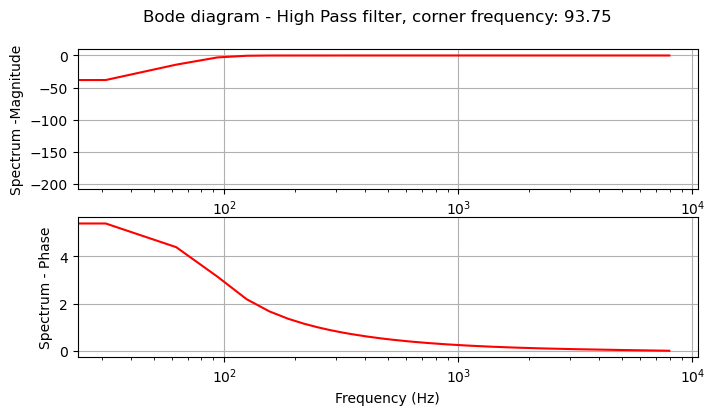

In [284]:
order=4
normal_cutoff=3*fs/NFFT
#----
b, a = signal.butter(order, normal_cutoff, btype='highpass', analog=False, output='ba', fs=fs)
wbutt, hbutt = signal.freqz(b, a,  worN=len(xx),fs=fs)
#----
print(len(wbutt), type(hbutt))
fig, axs = plt.subplots(2, figsize=(8,4))
fig.suptitle("Bode diagram - High Pass filter, corner frequency: "+ str(normal_cutoff) )
axs[0].semilogx(xx,20*np.log10(abs(hbutt[0:NFFT//2])),color='r')
axs[0].set_xlabel("Frequency (Hz)") 
axs[0].set_ylabel("Spectrum -Magnitude")
axs[0].grid()
#axs[0].grid(b=True, which='major', color='grey', linestyle='-')
#axs[0].grid(b=True, which='minor', color='grey', linestyle='--')
#------------------------------------------------------------

axs[1].semilogx(xx,np.unwrap(np.angle(hbutt[0:NFFT//2])),color='r')
axs[1].set_xlabel("Frequency (Hz)") 
axs[1].set_ylabel("Spectrum - Phase")
axs[1].grid()

#axs[1].grid(b=True, which='major', color='grey', linestyle='-')
#axs[1].grid(b=True, which='minor', color='grey', linestyle='--')

In [285]:
fs/NFFT


31.25

In [286]:
spectrum_valve= FFT_spectrum_ba(data_valve, NFFT, SubSeq_L, st, win, b, a)  #, spec_filter)
spectrum_noise= FFT_spectrum_ba(data_noise, NFFT, SubSeq_L, st, win, b, a)  #, spec_filter)

In [287]:
print(type(spectrum_valve), spectrum_valve.shape)
print(type(spectrum_noise), spectrum_noise.shape)

<class 'numpy.ndarray'> (192, 256)
<class 'numpy.ndarray'> (1870, 256)


<b>Plot a few spectra</b> 

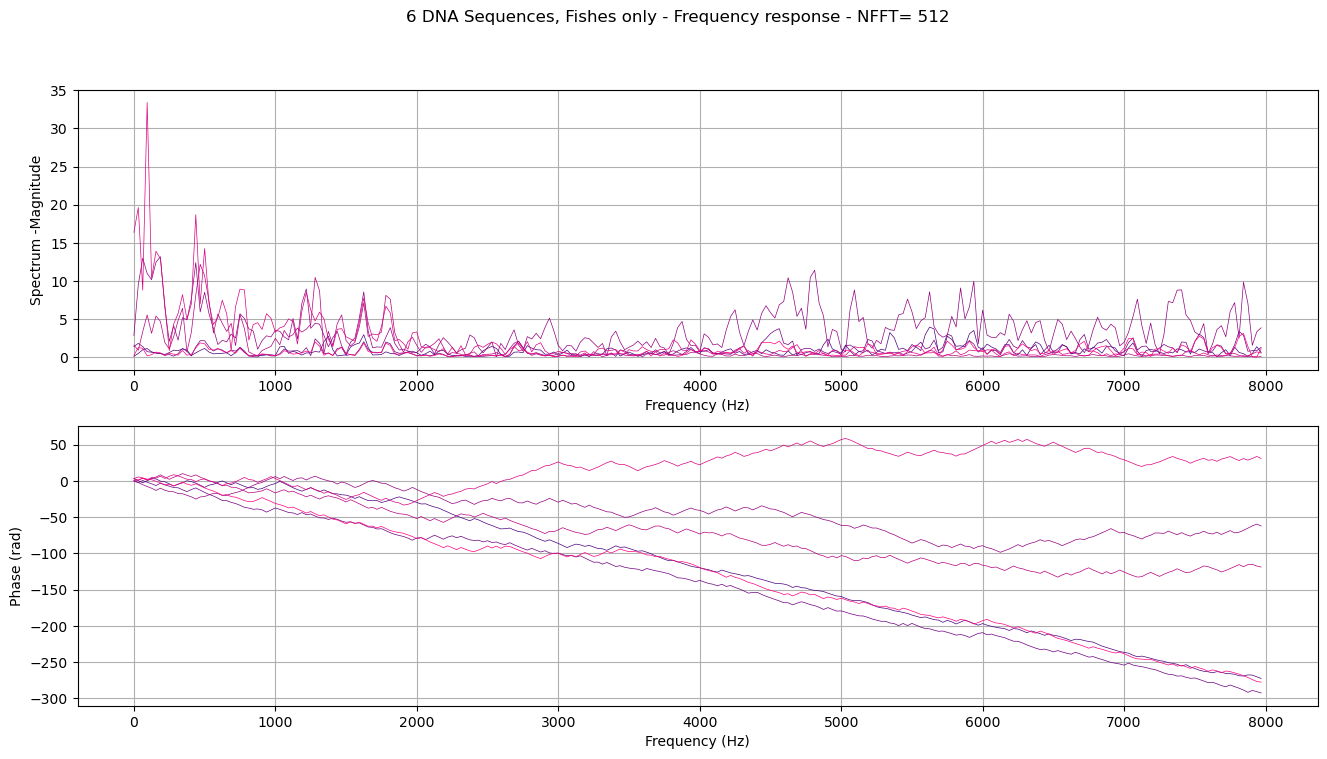

In [288]:
fig, axs = plt.subplots(2, figsize=(16,8))
fig.suptitle("6 DNA Sequences, Fishes only - Frequency response - NFFT= "+str(NFFT))
#  FFT Magnitude - HIGH-Pass 

for j in range(2,8) :
        #  FFT magnitude
        #axs[0].plot(xx,np.abs(spectrum_F[j]),color=((8-j)/8, 0.2, j/8), linewidth=0.5)
        axs[0].plot(xx,np.abs(spectrum_valve[j]),color=(j/7, 0., 0.5), linewidth=0.5)
        #  FFT phase
        axs[1].plot(xx,np.unwrap(np.angle(spectrum_valve[j])),color=(j/7, 0, 0.5), linewidth=0.5)

#--------------------------
axs[0].set_xlabel("Frequency (Hz)") 
axs[0].set_ylabel("Spectrum -Magnitude")
axs[0].grid()
#axs[0].grid(b=True, which='major', color='grey', linestyle='-')
#axs[0].grid(b=True, which='minor', color='grey', linestyle='--')
#-----------------------------------------------------------------
axs[1].set_xlabel("Frequency (Hz)") 
axs[1].set_ylabel("Phase (rad)")
axs[1].grid()
#axs[1].legend(['FFT', 'FFT w. window'])
#axs[1].grid(b=True, which='major', color='grey', linestyle='-')
#axs[1].grid(b=True, which='minor', color='grey', linestyle='--')
plt.show()

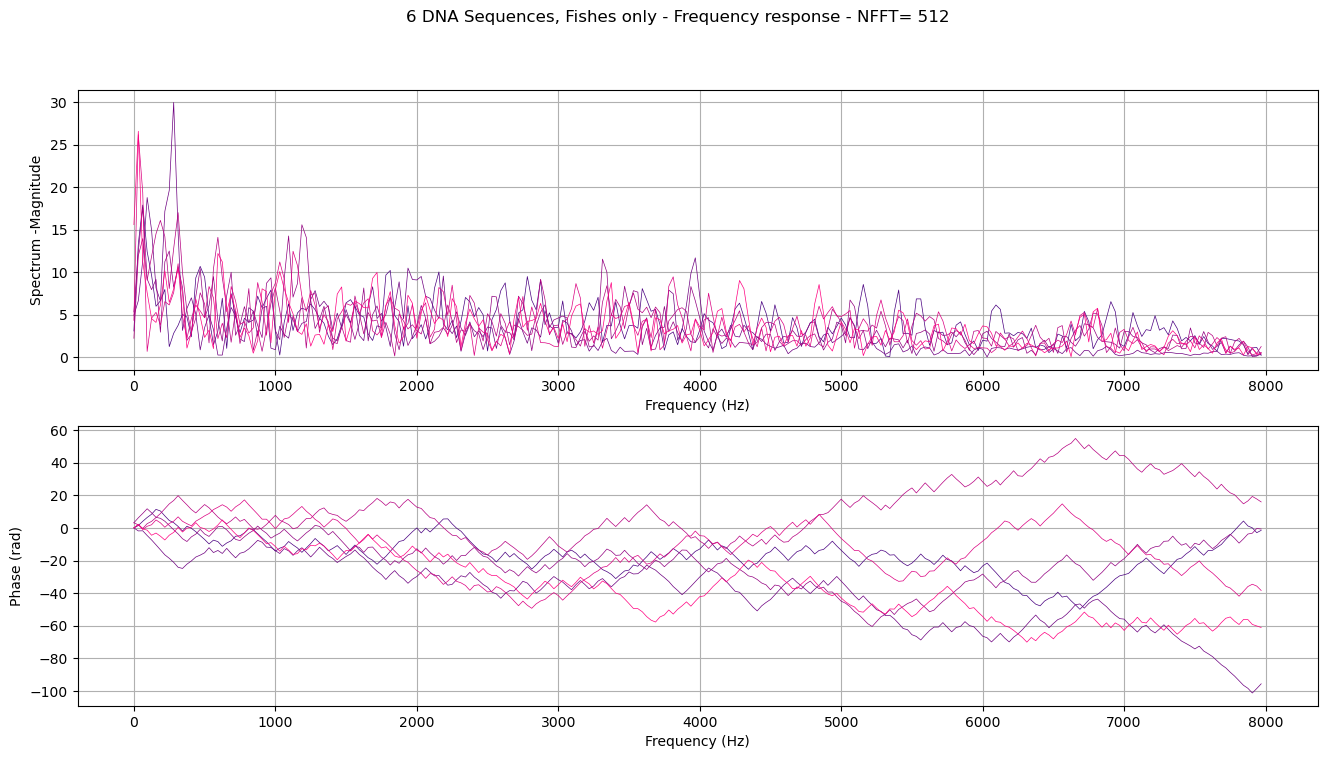

In [289]:
fig, axs = plt.subplots(2, figsize=(16,8))
fig.suptitle("6 DNA Sequences, Fishes only - Frequency response - NFFT= "+str(NFFT))
#  FFT Magnitude - HIGH-Pass 

for j in range(2,8) :
        #  FFT magnitude
        axs[0].plot(xx,np.abs(spectrum_noise[j]),color=(j/7, 0., 0.5), linewidth=0.5)
        #  FFT phase
        axs[1].plot(xx,np.unwrap(np.angle(spectrum_noise[j])),color=(j/7, 0, 0.5), linewidth=0.5)

#--------------------------
axs[0].set_xlabel("Frequency (Hz)") 
axs[0].set_ylabel("Spectrum -Magnitude")
axs[0].grid()
#axs[0].grid(b=True, which='major', color='grey', linestyle='-')
#axs[0].grid(b=True, which='minor', color='grey', linestyle='--')
#-----------------------------------------------------------------
axs[1].set_xlabel("Frequency (Hz)") 
axs[1].set_ylabel("Phase (rad)")
axs[1].grid()
#axs[1].legend(['FFT', 'FFT w. window'])
#axs[1].grid(b=True, which='major', color='grey', linestyle='-')
#axs[1].grid(b=True, which='minor', color='grey', linestyle='--')
plt.show()

###  CLASSIFICATION

####   Dataframe, Labels, Features. 

In [290]:
spectrum_valve_Mag=np.abs(spectrum_valve)
spectrum_noise_Mag=np.abs(spectrum_noise)

In [291]:
spectrum_valve_Phas=np.unwrap(np.angle(spectrum_valve))
spectrum_noise_Phas=np.unwrap(np.angle(spectrum_noise))

In [292]:
#spec_S=np.append(spectrum_valve_Mag, spectrum_valve_Phas, axis=1)
#spec_N=np.append(spectrum_noise_Mag, spectrum_noise_Phas, axis=1)


spec_S=spectrum_valve_Mag
spec_N=spectrum_noise_Mag

In [293]:
import pandas as pd
df_S = pd.DataFrame(spec_S)
df_N = pd.DataFrame(spec_N)

In [294]:
listS =  [1] * len(df_S)
listN =  [0] * len(df_N)


df_S['Class'] = listS
df_N['Class'] = listN

In [295]:
df_SN= pd.concat([df_S,  df_N],axis=0)
df_SN.shape

(2062, 257)

In [296]:
df_SN.head()

0          1          2          3          4          5  \
0   0.697389   4.684876   5.191856   5.172220   1.901010   5.865295   
1  17.849199  32.703598  26.534724   7.441592   8.906648   3.866442   
2   0.107737   0.477876   0.960665   1.112768   0.693205   0.505417   
3   1.382683   1.803016   1.371597   0.707912   0.639514   0.567219   
4   2.832821   9.539483  12.974053  10.977622  10.140141  12.443330   

           6          7         8          9  ...       247       248  \
0   9.226378   7.190987  2.526031   1.594483  ...  0.285820  0.316921   
1  15.852547  10.026955  7.751981  10.504492  ...  0.144818  0.163588   
2   0.475420   0.345879  0.587298   0.905094  ...  0.963658  0.165735   
3   0.458780   0.246557  0.332061   0.119622  ...  0.417373  0.417884   
4  13.169229   6.497795  2.057979   4.110832  ...  2.662834  6.003559   

        249       250       251       252       253       254       255  Class  
0  0.236833  0.066734  0.410368  0.389855  0.208075  0.127610  0.267958      1  
1  0.332234  0.486244  0.464482  0.190397  0.110223  0.321339  0.052115      1  
2  1.297921  0.610064  0.438048  0.114018  0.445443  1.365441  0.598850      1  
3  1.603764  3.364235  2.874572  0.761552  0.841979  0.827943  1.281305      1  
4  7.139644  2.498097  9.830537  7.048515  1.538379  3.305888  3.842461      1  

[5 rows x 257 columns]

In [297]:
Y = df_SN['Class'].to_numpy()
Y[0:200]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [298]:
#col_i= np.arange(0,NFFT, 1, dtype=int)  #  nfft=512
col_i= np.arange(0,NFFT//2, 1, dtype=int)

list_col_i= col_i.tolist()
df1 = df_SN[list_col_i]
X0=df1.to_numpy()

In [299]:
X0.shape

(2062, 256)

In [374]:
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [375]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [376]:
import string

In [377]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    #sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    sns.heatmap(cm, square=True, annot=True, annot_kws={'fontsize':16}, fmt="d", cmap='Blues', cbar=True)  # modified for cosmetic reasons. We want beauty. 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 

    ax.xaxis.set_ticklabels(['Noise','Valve']);ax.yaxis.set_ticklabels(['Noise','Valve'])

In [378]:
transform = preprocessing.StandardScaler()

In [379]:
X = transform.fit_transform(X0)

In [380]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=5,  stratify= Y)

In [381]:
Y_train[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [382]:
print( X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1649, 256) (413, 256) (1649,) (413,)


## <span style="color:#0094cf;"> Logistic Regression </span>

In [388]:
parameters ={"C":[0.01,0.1,1,5],'penalty':['l2'], 'solver':('newton-cg', 'lbfgs', 'liblinear')}# l1 lasso l2 ridge
#parameters ={"C":[0.01,0.1,1,5],'penalty':['l2'], 'solver':['newton-cg']}# l1 lasso l2 ridge
#----------
lr=LogisticRegression(max_iter=1500)
print(parameters)

{'C': [0.01, 0.1, 1, 5], 'penalty': ['l2'], 'solver': ('newton-cg', 'lbfgs', 'liblinear')}


In [389]:
logreg_cv=GridSearchCV(estimator=lr, param_grid=parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1500),
             param_grid={'C': [0.01, 0.1, 1, 5], 'penalty': ['l2'],
                         'solver': ('newton-cg', 'lbfgs', 'liblinear')})

In [390]:
print("Best parameter:",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Best parameter: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9963636363636363


In [391]:
acc_LR=logreg_cv.score(X_test, Y_test);
print('Accuracy:', acc_LR)

Accuracy: 0.9927360774818402


In [392]:
yhat_LR= logreg_cv.predict(X_test)
print (classification_report(Y_test, yhat_LR, target_names=['Noise','Valve'])  )

              precision    recall  f1-score   support

       Noise       0.99      1.00      1.00       375
       Valve       0.97      0.95      0.96        38

    accuracy                           0.99       413
   macro avg       0.98      0.97      0.98       413
weighted avg       0.99      0.99      0.99       413



## <span style="color:#0094cf;"> Support Vector Machine </span>

In [393]:
#parameters = {'kernel':['rbf'],
parameters = {'kernel':('linear','poly','rbf'),        
              'C': np.logspace(-3, 2, 5),
              #'gamma':np.logspace(-3, 1, 6)}
              'gamma':[0.001]}
svm = SVC(probability=True)
print(parameters)

{'kernel': ('linear', 'poly', 'rbf'), 'C': array([1.00000000e-03, 1.77827941e-02, 3.16227766e-01, 5.62341325e+00,
       1.00000000e+02]), 'gamma': [0.001]}


In [394]:
svm_cv = GridSearchCV(svm,parameters,cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': array([1.00000000e-03, 1.77827941e-02, 3.16227766e-01, 5.62341325e+00,
       1.00000000e+02]),
                         'gamma': [0.001],
                         'kernel': ('linear', 'poly', 'rbf')})

In [395]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 100.0, 'gamma': 0.001, 'kernel': 'rbf'}
accuracy : 0.9975757575757577


In [396]:
acc_svm=svm_cv.score(X_test, Y_test)
print('Accuracy:', acc_svm)

Accuracy: 0.9951573849878934


In [397]:
yhat_svm= svm_cv.predict(X_test)
print (classification_report(Y_test, yhat_svm, target_names=['Noise','Valve'])) 

              precision    recall  f1-score   support

       Noise       0.99      1.00      1.00       375
       Valve       1.00      0.95      0.97        38

    accuracy                           1.00       413
   macro avg       1.00      0.97      0.99       413
weighted avg       1.00      1.00      1.00       413



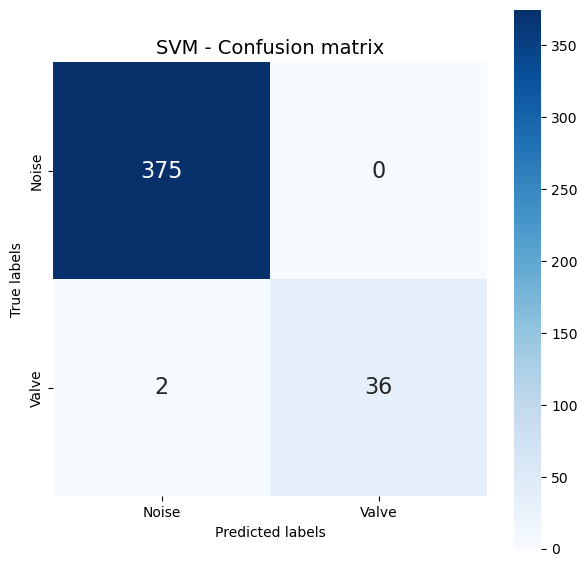

In [398]:
fig=plt.figure(figsize=(7,7))
plot_confusion_matrix(Y_test,yhat_svm)
plt.title("SVM - Confusion matrix", fontsize=14)
plt.savefig("BFM_figure2.png")

###  Testing the VAD with a single microphone recording 

In [399]:
from scipy import signal
from skimage import util
import scipy.signal
from scipy.io import wavfile



test_audio, samplerate = librosa.load('Beamformer_Output.wav', sr=16000) #
#test_audio, samplerate = librosa.load('Mic1.wav', sr=16000) #
test_audio_v2=test_audio
audio_title='Quiet'




print(samplerate)
print(np.shape(test_audio))
t_audio = np.arange(0, len(test_audio), 1);
#---------------------------------------------------------------------
#      Frames like in Matlab -  nfft=512, 66% overlap.   st=floor(M/3)
#---------------------------------------------------------------------
test_audio00=test_audio;
NFFT=512
st= np.floor(NFFT/3).astype(int)
frames_test = util.view_as_windows(test_audio00, window_shape=NFFT, step=st)
np.shape(frames_test)

16000
(160512,)


(942, 512)

plt.plot(test_audio00)

In [400]:
audio_data_VAD= frames_test

In [322]:
np.shape(audio_data_VAD)

(942, 512)

In [401]:
print('running...   ')
print('  ')

FMAGT=[]
FPHAST=[]

for i in range(0,len(audio_data_VAD)):

    if i % 500 == 0:
        print(i)
    
    audio_data_VAD[i]=   audio_data_VAD[i] / np.max(abs(audio_data_VAD[i]) +1e-8); 

    #amag= np.abs(hbutt*np.fft.fft(audio_data_VAD[i][0:NFFT//2]))   
    #aphas= np.unwrap(np.angle(hbutt*np.fft.fft(audio_data_VAD[i][0:NFFT//2])))   
    
   # amag= np.abs(hbutt*np.fft.fft(audio_data_VAD[i,:]))   
   # aphas= np.unwrap(np.angle(hbutt*np.fft.fft(audio_data_VAD[i,:])))      
    
    amag= np.abs(np.fft.fft(audio_data_VAD[i,0:NFFT//2]))   
    aphas= np.unwrap(np.angle(np.fft.fft(audio_data_VAD[i,0:NFFT//2])))   
    
    #amag= np.abs(fft(audio_data_VAD[i][0:NFFT//2]))   
    #aphas= np.unwrap(np.angle(fft(audio_data_VAD[i][0:NFFT//2]))) 
    
    FMAGT.append(amag)       # ~5:256   ~150Hz to 8000 Hz
    FPHAST.append(aphas) 

running...   
  
0
500


In [402]:
np.shape(hbutt)

(256,)

In [403]:
np.shape(FMAGT), np.shape(FPHAST), np.shape(audio_data_VAD)

((942, 256), (942, 256), (942, 512))

In [404]:
#XX0= np.concatenate([FMAGT, FPHAST],axis=1)
#concat([df_S,  df_N],axis=0)
XX0=FMAGT

In [405]:
np.shape(XX0)

(942, 256)

In [406]:
XX = transform.fit_transform(XX0)

In [408]:
s=logreg_cv.predict(XX)
proba_s=logreg_cv.predict_proba(XX)[:,1]

In [409]:
#s=svm_cv.predict(XX)
#proba_s=svm_cv.predict_proba(XX)[:,1]

proba_s[0:20]

In [410]:
t=  np.arange(0, len(s), 1)

In [411]:
test_audio_ini, samplerate = librosa.load('Beamformer_Output.wav', sr=16000) #

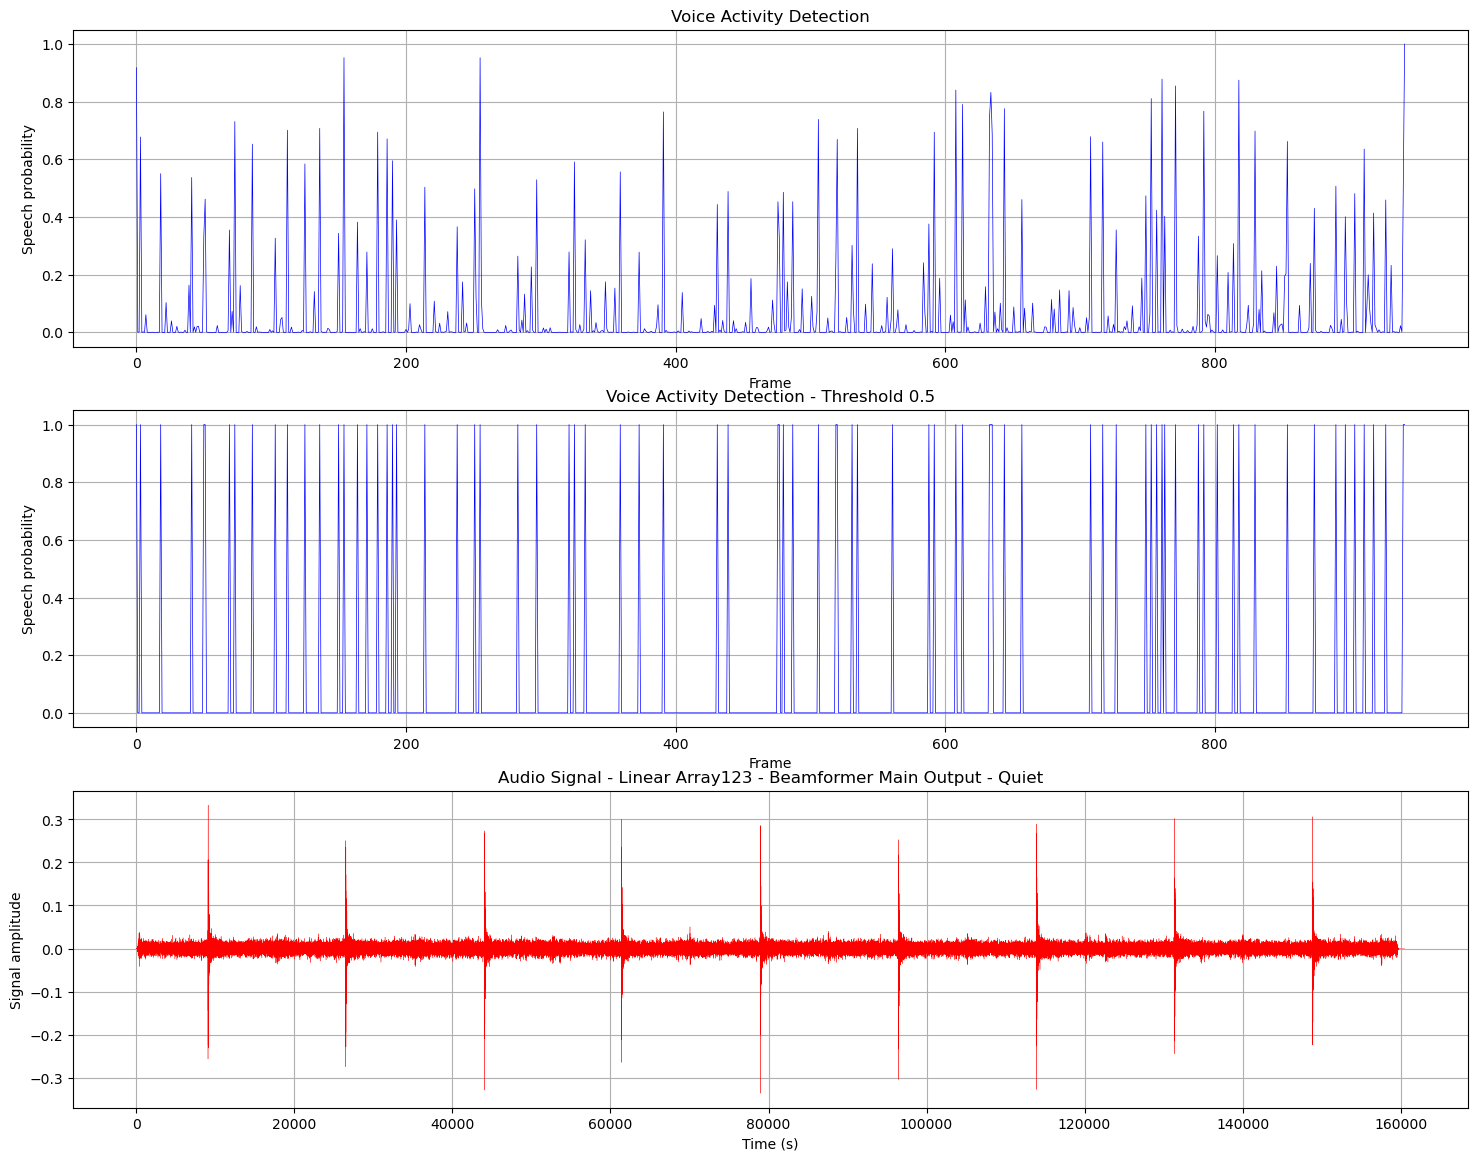

In [413]:
#save_path='dog_time.jpg'
fig=plt.figure(figsize=(18,14))


ax = fig.add_subplot(3, 1, 1)
#  RGBA tuple  ((0,1,0,1))    Alpha is transparency from 0 to 1   
#plt.plot(t,np.floor(s[:,1]+0.5),'b',linewidth=0.5)
plt.plot(proba_s,'b',linewidth=0.5)
#plt.plot(s,'b',linewidth=0.5)
#ax.set_xlim(0, len(t))
ax.set_xlabel('Frame')
ax.set_ylabel('Speech probability')
#plt.title('Audio recording: '+str(ind[0])+' Class: '+str(labels[ind[0]]))
plt.title('Voice Activity Detection')
ax.grid()


ax = fig.add_subplot(3, 1, 2)
#  RGBA tuple  ((0,1,0,1))    Alpha is transparency from 0 to 1   
plt.plot(np.floor(proba_s+0.75),'b',linewidth=0.5)
#plt.plot(np.floor(s+0.9),'b',linewidth=0.5)
#plt.plot(t,s,'g',linewidth=1)
#plt.plot(t,s[:,1],'b',linewidth=0.5)
#ax.set_xlim(0, len(t))
ax.set_xlabel('Frame')
ax.set_ylabel('Speech probability')
#plt.title('Audio recording: '+str(ind[0])+' Class: '+str(labels[ind[0]]))
plt.title('Voice Activity Detection - Threshold 0.5')
ax.grid()

ax = fig.add_subplot(3, 1, 3)
#  RGBA tuple  ((0,1,0,1))    Alpha is ytransparecy from 0 to 1   
plt.plot(test_audio_ini ,'r',linewidth=0.25)
#plt.plot(frames_test,'r',linewidth=0.25)

#ax.set_xlim(0, len(t_audio))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
#plt.title('Audio recording - : '+str(ind[1])+' Class: '+str(labels[ind[1]]))
#plt.title('Audio Signal - Linear Array123 - Beamformer Main Output - '+audio_title)
#plt.title('Audio Signal - Linear Array123 - Beamformer Main Output - '+audio_title)
plt.title('Audio Signal - Linear Array123 - Beamformer Main Output - '+audio_title)
ax.grid()

In [414]:
#VAD_valve_p=np.array([t+1,np.floor(s[:,1]+0.5)])  

VAD_valve_p=np.array(np.floor(proba_s+0.65))  

In [415]:
VAD_valve_p.shape

(942,)

In [416]:
np.savetxt('VAD_valve_p_beamformer_out.txt', VAD_valve_p)

###   Deep Learning 

In [583]:
spectro = []
spec_mag_i=[]
spec_phas_i=[]

hp_l= 8  # creates 256 samples in the time domain.  
n_m = 64
NFFT=128 # high definition. Remember 1 sec audio signal <--->  fs= 44100 points  or  fs= 22050 points 
trunc_mel= 64  # number of mels filters 

ind=[3, 10, 25, 45, 67,  90 ]



for i in ind:
    #print(i)
    S = librosa.stft(y=data_valve[i],                                          
                                        n_fft= NFFT, 
                                        hop_length= hp_l, 
                                        win_length= NFFT,     
                                        window='hann', 
                                        center=True,
                                        #center=False,
                                        pad_mode='constant')
                           
   
    #mel_feature = librosa.feature.melspectrogram(y=audio_data_red[i],sr=fs,
                                        #  n_fft= NFFT, 
                                        #  hop_length= hp_l, 
                                        #  win_length= NFFT, 
                                        #  window='hann', center=True, power=2, pad_mode='constant', n_mels=n_m)
    
    s_mag = 20*np.log10(np.abs(S)/1); #librosa.power_to_db(S, ref=1e-3)
   # s_phas= np.unwrap(np.angle(S)); 
    #s_phas= np.angle(S); 
    
    spec_mag_i.append(s_mag)  
    #spec_phas_i.append(s_phas)  

    
    
spec_mag_i =np.array(spec_mag_i)
#spec_phas_i =np.array(spec_phas_i)
#y, sr = librosa.load(librosa.ex('trumpet'))
#S = np.abs(librosa.stft(y))
#S

In [584]:
np.shape(spec_mag_i), np.shape(data_valve)
spec_mag=spec_mag_i[:,0:n_m,0:n_m]
#spec_phas=spec_phas_i[:,0:n_m,0:n_m]
spec_mag.shape  #, spec_phas.shape

(6, 64, 64)

In [585]:
spectron = []
specn_mag_i=[]
specn_phas_i=[]

hp_l= 8  # creates 256 samples in the time domain.  
n_m = 64
NFFT=128 # high definition. Remember 1 sec audio signal <--->  fs= 44100 points  or  fs= 22050 points 
trunc_mel= 64  # number of mels filters 

ind=[3, 10, 25, 45, 67,  90 ]



for i in ind:
    #print(i)
    Sn = librosa.stft(y=data_noise[i],                                          
                                        n_fft= NFFT, 
                                        hop_length= hp_l, 
                                        win_length= NFFT,     
                                        window='hann', 
                                        center=True,
                                        #center=False,
                                        pad_mode='constant')
                           
   
    #mel_feature = librosa.feature.melspectrogram(y=audio_data_red[i],sr=fs,
                                        #  n_fft= NFFT, 
                                        #  hop_length= hp_l, 
                                        #  win_length= NFFT, 
                                        #  window='hann', center=True, power=2, pad_mode='constant', n_mels=n_m)
    
    s_magn = 20*np.log10(np.abs(Sn)/1); #librosa.power_to_db(S, ref=1e-3)
   # s_phas= np.unwrap(np.angle(S)); 
    #s_phas= np.angle(S); 
    
    specn_mag_i.append(s_magn)  
    #spec_phas_i.append(s_phas)  

    
    
specn_mag_i =np.array(specn_mag_i)
#spec_phas_i =np.array(spec_phas_i)
#y, sr = librosa.load(librosa.ex('trumpet'))
#S = np.abs(librosa.stft(y))
#S

In [586]:
specn_mag=specn_mag_i[:,0:n_m,0:n_m]

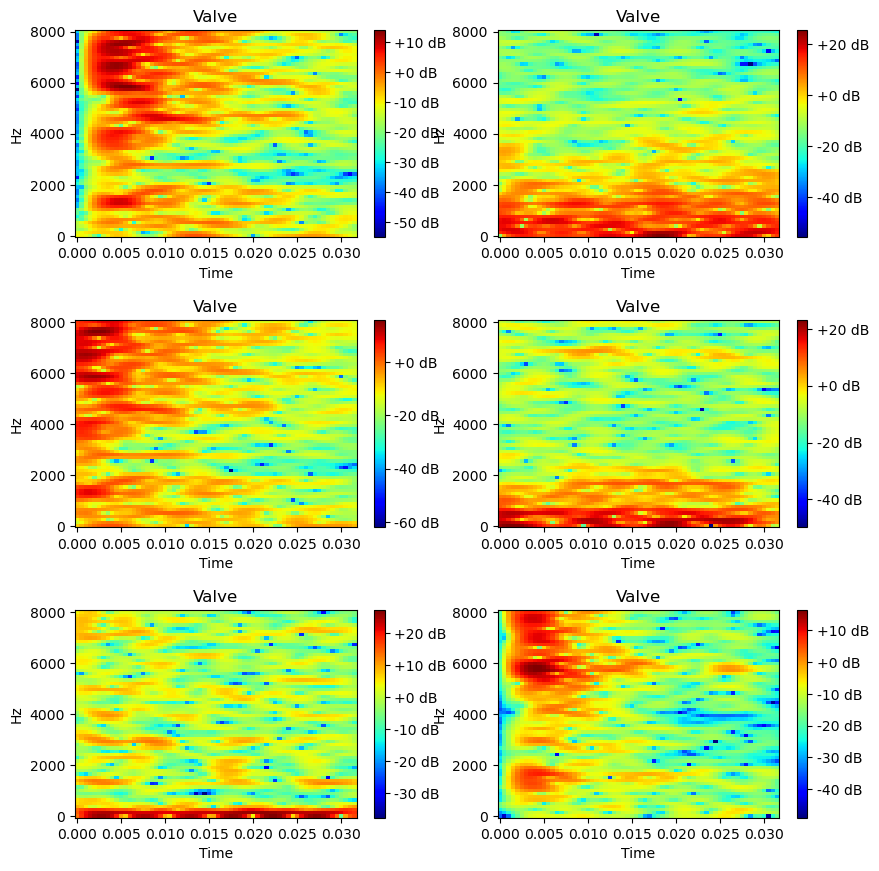

In [587]:
list_soundtype=['Valve', 'Valve', 'Valve', 'Valve',  'Valve',  'Valve' ]   

fig=plt.figure(figsize=(10, 14))
plt.subplots_adjust(#left=0.1,
                    #bottom=0.1,
                    #right=0.9,
                    #top=0.9,
                    #wspace=0.5,
                    hspace=0.4)

for ii in range(3) :
    for jj in range(2) :
        k=2*ii + jj
        ax = fig.add_subplot(4, 2, k+1)
        #mels_dB=np.array(melspec[k,0:trunc_mel,:])
        img=librosa.display.specshow(spec_mag[k], y_axis='linear',   hop_length=hp_l, sr=fs,  
                         x_axis='time',  ax=ax, cmap='jet')
        fig.colorbar(img, ax=ax, format='%+2.0f dB')
        #ax.set(title='Mel-frequency spectrogram'+list_soundtype[k])
        ax.set(title=list_soundtype[k])
        

plt.show()

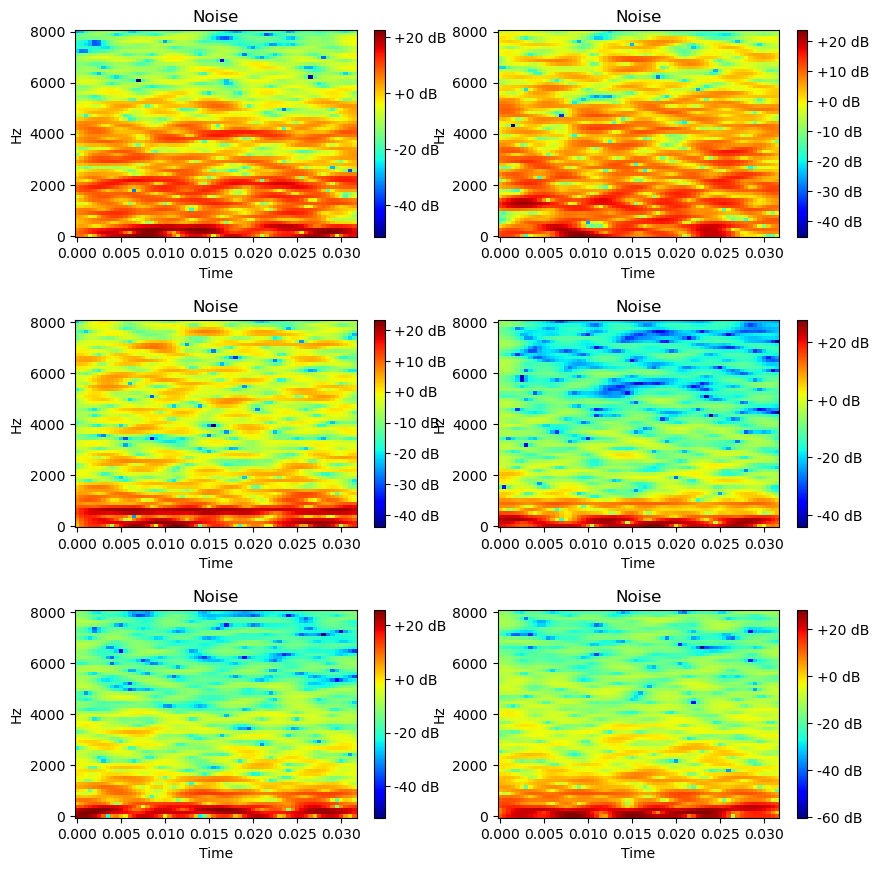

In [588]:
       
list_soundtype=['Noise', 'Noise','Noise', 'Noise',  'Noise',  'Noise' ]   

fig=plt.figure(figsize=(10, 14))
plt.subplots_adjust(#left=0.1,
                    #bottom=0.1,
                    #right=0.9,
                    #top=0.9,
                    #wspace=0.5,
                    hspace=0.4)

for ii in range(3) :
    for jj in range(2) :
        k=2*ii + jj
        ax = fig.add_subplot(4, 2, k+1)
        #mels_dB=np.array(melspec[k,0:trunc_mel,:])
        img=librosa.display.specshow(specn_mag[k], y_axis='linear',   hop_length=hp_l, sr=fs,  
                         x_axis='time',  ax=ax, cmap='jet')
        fig.colorbar(img, ax=ax, format='%+2.0f dB')
        #ax.set(title='Mel-frequency spectrogram'+list_soundtype[k])
        ax.set(title=list_soundtype[k])
        

plt.show()